In [1]:
import pymysql
import numpy as np
def cluster_centroids(data, clusters, k=None):
    """Return centroids of clusters in data.

    data is an array of observations with shape (A, B, ...).

    clusters is an array of integers of shape (A,) giving the index
    (from 0 to k-1) of the cluster to which each observation belongs.
    The clusters must all be non-empty.

    k is the number of clusters. If omitted, it is deduced from the
    values in the clusters array.

    The result is an array of shape (k, B, ...) containing the
    centroid of each cluster.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> cluster_centroids(data, np.array([1, 1, 2, 2, 0, 1]))
    array([[ 79.,  40.,  89.],
           [  5.,  33.,  44.],
           [ 78.,  22.,  49.]])

    """
    if k is None:
        k = np.max(clusters) + 1
    result = np.empty(shape=(k,) + data.shape[1:])
    for i in range(k):
        np.mean(data[clusters == i], axis=0, out=result[i])
    return result

import scipy.spatial

def kmeans(data, k=None, centroids=None, steps=20):
    """Divide the observations in data into clusters using the k-means
    algorithm, and return an array of integers assigning each data
    point to one of the clusters.

    centroids, if supplied, must be an array giving the initial
    position of the centroids of each cluster.

    If centroids is omitted, the number k gives the number of clusters
    and the initial positions of the centroids are selected randomly
    from the data.

    The k-means algorithm adjusts the centroids iteratively for the
    given number of steps, or until no further progress can be made.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> np.random.seed(73)
    >>> kmeans(data, k=3)
    array([1, 1, 2, 2, 0, 1])

    """
    if centroids is not None and k is not None:
        assert(k == len(centroids))
    elif centroids is not None:
        k = len(centroids)
    elif k is not None:
        # Forgy initialization method: choose k data points randomly.
        centroids = data[np.random.choice(np.arange(len(data)), k, False)]
    else:
        raise RuntimeError("Need a value for k or centroids.")

    for _ in range(max(steps, 1)):
        # Squared distances between each point and each centroid.
        sqdists = scipy.spatial.distance.cdist(centroids, data, 'sqeuclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(sqdists, axis=0)

        new_centroids = cluster_centroids(data, clusters, k)
        if np.array_equal(new_centroids, centroids):
            break

        centroids = new_centroids

    return clusters

In [26]:
def clr(tmp):
    tmp = tmp.replace(',),','')
    tmp = tmp.replace(',','')
    tmp = tmp.replace(',)','')
    tmp = tmp.replace('(','')
    tmp = tmp.replace(')','')
    tmp = tmp.replace('\"','')
    tmp = tmp.replace('?','')
    #tmp = tmp.replace('/',' ')
    tmp = tmp.replace(".\'",'')
    tmp = tmp.replace("u'",'')
    tmp = tmp.replace("'s",'')
    tmp = tmp.replace(".",'')
    tmp = tmp.replace(":",'')
    tmp = tmp.lower()
    tmp = tmp.replace('-','')
#    for i in range(100):
 #       tmp = tmp.replace(str(i),'')
    return tmp

In [29]:
IT_word =['1g or analog', 'abpd', 'absorption chillers', 'access media gateways', 'access method', 'accountable care organization', 'accredited standards committee', 'acr', 'acris', 'active matrix organic light-emitting diodes', 'activity-based costing', 'activity-based management', 'ad ops', 'addressable tv advertising', 'adsorption chillers', 'advanced clinical research information systems', 'advanced distribution management systems', 'advanced distribution protection and restoration devices', 'advanced fraud detection and analysis technologies', 'advanced planning and scheduling', 'advanced research projects agency network', 'advanced server energy monitoring tools', 'advanced shipment notice', 'advanced technology group', 'advanced threat detection', 'advertisement action', 'advocacy marketing', 'aerial and digital imagery', 'agent collaboration tools', 'agent portal solutions', 'agile marketing project management', 'agile neorad', 'aio pcs', 'algorithmic business', 'all-in-one', 'alliance and relationship management', 'alm paas', 'also lean sensei', 'alternative card networks', 'alternative delivery models', 'ambient and glanceable displays', 'american standard code for information interchange', 'amo', 'answer marketplace', 'applicant tracking systems', 'application delivery controller', 'application infrastructure suite', 'application life cycle management platform as a service', 'application modernization services', 'application obfuscation', 'application platform as a service', 'application release automation', 'application software services', 'channel', 'technology and industry', 'application-specific integrated circuit', 'application-specific standard product', 'applications portfolio analysis', 'aps', 'arad', 'architected rapid application development', 'model-driven development', 'assemble to order', 'asset performance management', 'atd appliances', 'audio messaging interchange specification', 'audio mining/speech analytics', 'auto-tiering', 'automated document factory', 'automated payment tracking and reconciliation services', 'automated system operations', 'automated vehicle locating', 'automatic storage tiering', 'autonomous system number', 'average inventory', 'average selling price', 'average speed of answer', 'b2b gateway software', 'back-end', 'backup/recovery software', 'bandwidth as currency', 'bank tiers', 'bapi', 'bar code marketing', 'basic input/output system', 'basic trading area', 'battery-powered radio frequency identification', 'behavior learning engines', 'behavioral/gestural analytics', 'best-in-class', 'best-of-breed', 'bi platforms', 'bi services', 'bill of lading', 'bill-of-materials', 'binary large object', 'binary runtime environment for wireless', 'binary synchronous communications', 'bioinformatics and chemoinformatics', 'biometric atms', 'bipv', 'blanking interval', 'ble', 'blu-ray', 'bluetooth 3.0', 'bluetooth 4.0', 'bpm pure-play', 'bpus', 'brand service company', 'branded content management', 'bre', 'bring your own device', 'bt3.0', 'bt4.0', 'build-operate-transfer', 'building-integrated photovoltaics', 'business application programming interface', 'business capability modeling', 'business continuity management planning', 'business continuity manager', 'business pattern recognition', 'business process analysis tools', 'business process as a service', 'business process re-engineering', 'business process utilities', 'business rule engines', 'business service provider', 'c-band', 'c-commerce', 'c/im software', 'cable service provider', 'cagr', 'call detail recording', 'cam', 'capable-to-promise', 'capacity requirements planning', 'car connectivity consortium', 'cargo portals', 'carrier network infrastructure', 'casbs', 'case', 'case management solutions', 'case-based reasoning', 'catalog content management', 'ccas', 'cd-rw', 'cellular multi-processing', 'cellular to wi-fi authentication', 'cert', 'certified network professional', 'channel service unit', 'charge-coupled device', 'chip design starts', 'circuit grade', 'circuit-switched data', 'citizen developer', 'cko', 'claims analytics', 'claims management solutions', 'class of service', 'class-based queuing', 'classless inter-domain routing', 'clear to send', 'click-through', 'click-through rate', 'clicks and bricks', 'client appliance', 'client computing hardware services', 'client management tools', 'climate-driven forecasting', 'clinical information modeling initiative', 'clinical kiosks', 'clocking', 'closed user group', 'closed-loop material requirements planning', 'closed-loop mrp', 'closed-loop performance management', 'cloud access security brokers', 'cloud advertising', 'cloud communications service provider', 'cloud email', 'cloud encryption gateways', 'cloud printing services', 'cloud security gateways', 'cloud sourcing deals anatomy', 'cloud-based grid computing', 'cluster controller', 'cmip over llc', 'cmip over tcp/ip', 'cmns', 'co-creation', 'codd\xe2\x80\x99s rule zero', 'collective competency', 'college of healthcare information management executives', 'column-store database management system', 'com', 'comanagement processes', 'combined heat and power', 'commerce everywhere', 'commerce platform servers', 'commercial telematics', 'committed access rate', 'common internet file system', 'common messaging calls', 'common open software environment', 'common public radio interface', 'communications as a service', 'communications oriented production information and control system', 'community of practice', 'compact disc-rewritable', 'compare operational readiness evaluation', 'complementary metal-oxide semiconductor', 'complex-event processing', 'compliance unit', 'component object library', 'component-based development', 'composite content applications', 'comprehensive production architecture', 'computational-fluid-dynamic', 'computer output to laserdisc', 'computer output to microfilm or microfiche', 'computer-aided design and drafting', 'computer-aided engineering', 'computer-aided manufacturing', 'computer-aided patient-entered medical history', 'computer-aided software engineering', 'computer-based patient record', 'computer-based physician order entry', 'computer-brain interface', 'computer-integrated manufacturing', 'computer-telephony integration', 'computerized maintenance management system', 'computing appliance', 'computing platform products', 'concurrent backup', 'concurrent database restore', 'connected game handhelds', 'connected imaging devices', 'connected portable media players', 'connected portable navigation devices', 'connection-oriented service', 'consolidated service desk', 'constant linear velocity', 'consultative selling', 'consumer broadband connections', 'consumer broadband services', 'consumer digital rights management', 'consumer internet services', 'consumer nas', 'consumer network attached storage', 'consumer telematics', 'consumer voice access lines', 'consumer voice services', 'consumer web mashups', 'consumer-generated media', 'contact center infrastructure', 'contact center system', 'contact center workforce optimization', 'contact database', 'contactless payments', 'content and applications service provider', 'content marketing platforms', 'content-aware data loss prevention', 'context delivery architecture', 'context management engine', 'context-aware computing', 'context-aware security', 'context-enriched content', 'context-enriched services', 'contextual presence', 'continuous controls monitoring', 'contract life cycle management', 'control objectives for information and related technology', 'converged network services', 'convergent charging', 'cooling management systems', 'core banking system', 'corporate and major enterprise', 'corporate license agreement', 'corporate property management software', 'corporate trade exchange', 'corporate website activity', 'cost per click', 'cost per gross add', 'cost to serve', 'cpe business dsl router with embedded dsl modem', 'cpe external stand-alone modem', 'cpe internal modem', 'cpemh', 'cpm suites', 'cpq application suites', 'crisis/incident management', 'critical path method or critical path management', 'critical to quality', 'critical-path scheduling', 'crm printing', 'crm publishing', 'cross-certification', 'cross-compiler', 'cross-docking', 'cross-modulation', 'ctp systems', 'cumulative lead time', 'custom key set', 'customer communications management', 'customer engagement center', 'customer gateways', 'customer information file', 'customer information management', 'customer information management and application', 'customer self-service and support', 'customer service and support', 'customized network management', 'cyber incident response plan', 'cyber incident response team', 'cyber library', 'daisy-chaining', 'dapp', 'data analysis and provider profiling', 'data center outsourcing', 'data center storage encryption', 'data dependency mapping', 'data loss protection', 'data management and integration', 'data ops', 'data quality software as a service', 'data-driven marketing', 'database audit and protection', 'ddvn', 'deal sweet spot analysis', 'defects per million opportunities', 'defects per opportunity', 'defects per unit', 'measure', 'analyze', 'improve', 'control', 'demand pattern analysis', 'demand signal repository', 'demand-driven value network', 'deming pdca cycle', 'design for six sigma', 'design for x', 'design-to-demand', 'desktop outsourcing', 'development and integration services', 'device-embedded biometric authentication', 'diagnostic analytics', 'dif', 'digital ad operations platforms', 'digital agencies', 'digital audio broadcasting plus', 'digital audiotape', 'digital commerce experience', 'digital cross-connect', 'digital dial tone', 'digital loopback', 'digital marketing hub', 'digital pathology scanners', 'digital thick wallet solutions', 'digital thin wallet solutions', 'digital transformation consulting', 'direct chip cooling', 'direct to home', 'direct-access storage device', 'directorate general of telecommunications', 'dirty protocols', 'disciplined multisourcing', 'discretionary security controls', 'dish/stirling engine', 'proprietary', 'distributed tape for backup and archiving', 'distribution requirements planning', 'docomo java', 'document management hardware services', 'document-enabled vertical application', 'doja', 'dpmo', 'buffer', 'rope', 'dsl/cable-sharing residential/small-office gateway/router', 'dual-attached station', 'dual-band', 'dual-band network', 'dual-view displays', 'dvcs', 'dxc', 'dye sublimation', 'dye-sensitized solar cells', 'dynamic application security testing', 'dynamic data masking', 'dynamic web application tools', 'e-book readers', 'e-business', 'e-coupons', 'e-crm', 'e-discovery software', 'e-forms', 'e-learning', 'e-mobility', 'e-otd', 'e-prescribing', 'e-procurement', 'e-readers', 'e-signature', 'e-waste', 'ea assurance', 'eao', 'economizers', 'eh&s applications', 'electro mobility', 'electronic bill presentment and payment', 'embedded cellular data', 'embedded software and electronics design', 'emerging data protection schemes', 'ems', 'endpoint protection platform', 'energy trading and risk management', 'enhanced data rates for global evolution', 'enhanced e-books', 'enhanced network delivery', 'ens', 'ensemble interactions', 'enterprise and public network', 'enterprise application outsourcing', 'enterprise information archiving', 'enterprise mobile communications gateway', 'enterprise nervous system', 'enterprise security intelligence', 'enterprise technology architecture', 'enterprise unified communications infrastructure', 'enterprise-class', 'enterprise-grade', 'entity resolution and analysis', 'entry-level smartphone', 'environmental health and safety', 'er&a', 'erasable paper printing systems', 'fault and log management', 'event-driven architecture', 'event-triggered marketing', 'external services provider', 'external social software', 'extreme low-energy servers', 'f-commerce', 'fabric-based computing', 'fabric-based infrastructure', 'facebook commerce', 'falm', 'fast-packet switching', 'fault detection and isolation', 'feature smartphone', 'federated application life cycle management', 'fiber to the home', 'fiber to the premises', 'fibre channel over ethernet', 'field sales/inside sales', 'field service management software', 'financial analytical applications', 'financial footprint', 'finished branded product', 'firecall', 'first generation', 'first pass yield', 'fixed-line carrier', 'fixed-mobile convergence', 'flexible media and conferencing switching', 'footfall analysis', 'foreign/global trade compliance', 'formula/recipe management', 'fpy', 'freedom of mobile multimedia access', 'frequency-hopping multiple access', 'gain sharing', 'gan', 'gemba', 'gemba walk', 'geospatial mashups', 'geothermal cooling for data centers', 'geothermal power generation', 'global regulatory management', 'green money', 'grid computing without using public cloud computers', 'gross new connections', 'han', 'hand-off', 'handheld device markup language', 'haptics in automotive', 'hardware and software maintenance services', 'hardware maintenance and support services', 'hcm application services', 'hcm in social software', 'hcpcs', 'hdml', 'head-mounted displays', 'head-up displays', 'health insurance portability and accountability act', 'health plan employer data and information set', 'healthcare infomediary', 'healthcare procedural classification system', 'hedis', 'help desk management', 'hierarchical storage management and archive software', 'high performance workplace', 'high tj systems', 'high-concentration photovoltaics', 'high-definition', 'high-performance computing', 'high-speed color inkjet printing', 'high-temperature superconductivity', 'his', 'historian software', 'home location register', 'home-area network', 'hospital information system or healthcare information system', 'hosted pc virtualization software', 'hosted virtual desktops', 'hr disintermediation', 'hr shared-service-center tools', 'http 2.0', 'hundred call seconds', 'hybrid storage gateway appliance', 'hybrid thinking', 'hybrid unified communications and collaboration', 'hydrogen fuel cell vehicles', 'hyperprotocol', 'iam as a service', 'iamaas', 'icd-10 adoption technology', 'idars', 'ide', 'identity and access intelligence', 'identity and access management', 'identity-aware networks', 'identity-proofing services', 'iefm', 'ilpt', 'iltc', 'ims', 'imt-2000', 'imt-a', 'in erlangs', 'in-rack cooling', 'in-row cooling', 'incentive compensation management', 'industrialized it services', 'infocentric', 'infocomm development authority of singapore', 'infonomics', 'information capabilities framework', 'infrared data association', 'infrastructure as a service', 'infrastructure utility services', 'institute of electrical and electronics engineers', 'instruction set virtualization', 'instructor-led practical training', 'instructor-led training in the classroom', 'integrated applications environment', 'integrated definition methodology', 'integrated digital enhanced network', 'integrated document archive and retrieval system', 'integrated e-form management', 'integrated marketing management', 'integrated publishing architecture', 'integration appliances', 'integration as a service', 'integration platform as a service', 'intercompany multimodal unified communications', 'internal rate of return', 'international mobile equipment identifier', 'international mobile subscriber identity', 'international mobile telecommunications-2000', 'international organization for standardization', 'internet document security', 'internet message access protocol', 'internet of things', 'internet sales outlet', 'interoperable storage encryption', 'ip centrex platforms', 'ip extension line', 'ip multimedia subsystem session control layer', 'ip seat license', 'ip-enabled pbx', 'ip-enabled pbx/kts ip extension line', 'ip-pbx', 'ip-service control points', 'ipaas', 'it asset management', 'it chargeback', 'it consulting', 'it consulting services', 'it industrialization', 'it infrastructure utility', 'it management services', 'it operations management software', 'it service desk', 'it service support management tools', 'it services sourcing', 'it services strategic sourcing', 'it/ot alignment', 'it/ot integration', 'itam', 'itom', 'itsd', 'itssm tools', 'ius', 'java platform ad tools', 'just in time', 'k-map', 'ka-band', 'kaikaku', 'kerfless wafering', 'key process input variable', 'key process output variable', 'knowledge content owners', 'knowledge content specialists', 'knowledge work management', 'kohai', 'korea communications commission', 'kpiv', 'kpov', 'ku-band', 'kurtz-above band', 'kurtz-under band', 'kyoto wheel', 'l-band', 'lagging and leading key performance indicators', 'lan bridging', 'language-oriented development environments', 'laser disk', 'legacy application or system', 'lifetime clinical record', 'light-emitting diode', 'light-emitting polymer', 'lights-out recovery operations management', 'limited disclosure technology', 'line dot matrix', 'line hit', 'line impact dot matrix', 'line inkjet', 'line load control', 'line of business', 'line of code', 'link redundancy level', 'liquid crystal on silicon', 'lithium battery backup', 'local modifications memory', 'local number portability', 'local-area network', 'location-aware applications', 'location-aware technology', 'location-based advertising', 'location-based marketing', 'location-based services', 'longitudinal redundancy check', 'loosely coupled multiprocessing', 'low-cost it', 'lowest common denominator', 'loyads', 'lte-a', 'm-business', 'm-commerce', 'machine-to-machine', 'magic quadrant', 'magnetic-ink character recognition', 'magneto-optic', 'mini and midrange', 'mainstream notebook', 'managed network services', 'managed service provider', 'management services organization', 'marketing automation system', 'marketing content management', 'marketing database system', 'marketing encyclopedia system', 'marketing mix and product portfolio optimization', 'marketing mix modeling', 'marketing mix optimization', 'marketing performance management', 'marketing resource management', 'marketing service providers', 'marketscope', 'massive open online course', 'master content management', 'materials management information system', 'mdm services', 'media-embedded merchandising', 'mem', 'message numbering', 'message warehouse', 'messaging application programming interface', 'messaging device', 'messaging hypertext markup language', 'metadata and data modeling tools', 'micro-marketplace', 'microbrowser', 'microinverters', 'microsoft certified professional', 'million instructions per second', 'minutes of use', 'mobile and wireless infrastructure software platforms', 'mobile centrex', 'mobile cloud synchronization', 'mobile deep packet inspection', 'mobile device management services', 'mobile high-definition link', 'mobile pc odms', 'mobile transformers', 'mobile virtual network enabler', 'mobile voice over internet protocol', 'mobile wireless local loop', 'mobile-network operator', 'mobile/wireless portal', 'mobility managed services', 'model-driven architecture', 'model-driven packaged applications', 'molten salt energy storage', 'mous', 'adds and changes', 'moving picture experts group', 'mpeg-4 advanced video coding', 'multichannel campaign management', 'multichannel feedback management', 'multichannel loyalty', 'multifunction product', 'multimodal tms', 'multipurpose internet messaging extensions', 'mvne', 'n-channel metal-oxide semiconductor', 'nanography', 'nanomaterial supercapacitors', 'native code compiler for java', 'natural-language processing', 'natural-language understanding', 'nccj', 'nccm tools', 'ncop', 'necessary non-value-adding', 'net new connections', 'net present value', 'net-liberated organization', 'network access point', 'network and system management', 'network code of practice', 'network configuration and change management', 'network dynamic functionality', 'network fault monitoring tools', 'network on chip', 'network performance monitoring tools', 'network performance tuning/configuring facilities', 'network security silicon', 'network virtual terminal', 'network-attached storage', 'neural net or neural network', 'neurobusiness', 'next-generation firewalls', 'next-generation network', 'next-generation telematics protocol', 'nexus of forces', 'ngfws', 'ngtp', 'nmt-f', 'no-email initiatives', 'non-cable consumer fixed broadband', 'non-value-adding', 'nonwireline cellular carrier', 'object late binding', 'object transaction monitor', 'object-based middleware', 'object-based technologies', 'object-oriented analysis and design', 'object-oriented database management system', 'object-oriented programming', 'object-oriented system', 'object-oriented technology', 'off the shelf', 'offshore programming', 'oms', 'on-device monitoring', 'on-device portal', 'online complex processing', 'open compute project', 'open mobile alliance', 'operational resource management', 'operational technology', 'opnfv', 'opportunity management system', 'organic light-emitting diode', 'over the air', 'own design manufacturer', 'pace-layered application strategy', 'packet assembler/disassembler', 'packet-switched network', 'partial document encryption', 'partner customer support software', 'pattern-based strategy', 'pc virtual software appliance', 'pclm', 'peak transaction rate', 'peer-to-peer', 'performance-driven culture', 'persona management', 'personal access communication services', 'personal access system', 'phase alternate line', 'phase-shift keying', 'phmt', 'photonic crystal displays', 'physical resource and infrastructure management tools', 'physician contracting organization', 'physician hospital organization', 'plain old xml', 'platform as a service', 'platform-independent', 'pnds', 'point of presence', 'point of sale', 'point of service', 'point to point', 'poke-yoke', 'portable flash media for content distribution', 'portable storage device control', 'portal fabric', 'portal-enabling middleware', 'portals and user interaction tools', 'pos', 'postmodern erp', 'postpaid connection', 'power adaptive algorithms', 'predictive behavior analysis', 'predictive modeling solutions', 'prerelational dbms', 'print markets and management hardware', 'printed semiconductors', 'problem management', 'process analytical technology', 'line', 'procure-to-pay solution', 'product analytics', 'product cost and life cycle management', 'product portfolio and program management', 'product support services', 'professional services administration', 'protocol-transparent', 'ptt poc', 'public-key cryptography', 'public-key infrastructure', 'publish and subscribe', 'pull printing', 'pulse carrier', 'push-to-talk over cellular', 'quad-band', 'quality of service', 'quality of storage service', 'quantum dot displays', 'r-uim', 'rack mount', 'radio packet assembler/disassembler', 'radio pad', 'radio-frequency identification', 'rapid architected application development', 'redaction tools', 'redundant array of independent disks', 'availability and serviceability', 'removable modules', 'removable user identity module', 'repeatable solutions', 'requirements definition and management', 'resource requirements planning', 'retail digital signage', 'retail execution and monitoring', 'retirements', 'return on competitiveness', 'return on equity', 'return on information technology', 'return on investment', 'reusable analog intellectual property', 'risk management and compliance consulting services', 'risk-adjusted value management', 'roit', 'rotary heat exchanger', 'round-trip time', 'runtime application self-protection', 'rural service area', 's-band', 's-http', 'sales analytics', 'sales configuration systems', 'sales enablement', 'sales force automation \xe2\x80\x94 direct sales', 'sales to end users', 'sales-focused partner relationship management', 'sam', 'sam tools', 'satellite broadcasting operator', 'satellite communications operator', 'satellite navigation solutions', 'sc-fdma', 'scalable vector graphics interface', 'sciv', 'screen popping', 'scriptless testing', 'search-based data discovery tools', 'secondary station', 'secret-key cryptography', 'secure hypertext transport protocol', 'secure web gateway', 'security information and event management', 'security information and event management software', 'seiban', 'selective sourcing', 'self-describing messages', 'self-relocating program', 'self-service analytics', 'self-service business intelligence', 'self-test and fault isolation', 'sell side', 'semi-mobile wireless', 'senpai', 'sensor and rfid-based inventory and asset management business process application software', 'sensor and rfid-based inventory and asset management infrastructure software', 'serial dot matrix', 'serial inkjet', 'server virtualization infrastructure', 'server virtualization management', 'serverless printing', 'service management agreement', 'service parts planning', 'service provider routers and switches', 'service switching point', 'service-level agreement', 'service-level management', 'service-level objective', 'service-oriented architecture', 'serving area', 'serving gprs support node', 'seven wastes', 'sff-lr', 'shadow/mirror databases', 'shared services or shared services center', 'shielded pair', 'shortest path first', 'shrink-wrapped', 'signal-to noise ratio', 'signaling gateways/ip-stps', 'silicon anode batteries', 'simple api for xml', 'simplex circuit', 'simulation routines', 'single channel per carrier', 'single in-line memory module', 'single large expensive disk', 'single minute exchange of die', 'single sign-on', 'single-carrier frequency division multiple access', 'single-image mode', 'single-mode fiber', 'single-pass device', 'skills-based management', 'skinless servers', 'sma', 'small and midsize business', 'small office/home office', 'small-form-factor', 'legacy-reduced', 'small-to-midsize enterprise', 'smart mfp', 'smart pills', 'smfp', 'soa governance technologies', 'social software standards', 'socialcasting', 'society for worldwide interbank financial telecommunication', 'softswitch architecture', 'softswitches', 'software as a service', 'software change and configuration management', 'software failure detection and recovery', 'software oversight committee', 'software support services', 'software-defined networks', 'software-defined radio', 'solid-state appliances', 'sometimes ymck or \xe2\x80\x9cprocess color printing\xe2\x80\x9d', 'spaghetti chart', 'specialized mobile radio', 'tracking', 'evaluation', 'production', 'spectrum harmonization', 'speech circuit', 'ssem', 'stalking horses', 'standard performance evaluation corporation', 'statement of work', 'statistical quality control/statistical process control', 'statistical time-division multiplexing', 'stock-keeping unit', 'storage area network', 'storage subsystem hardware services', 'storage support services', 'store-and-forward manager', 'store-and-forward voice', 'strategic information office', 'iteration', 'testing', 'enablement', 'scripting', 'populating and channel outputs', 'sub-11ghz proprietary bwa', 'sub-voice-grade channel', 'objective', 'assessment and plan', 'subnet mask', 'subnet number', 'subscriber acquisition cost', 'subscriber identity module card', 'super video graphics array', 'super wi-fi', 'supervisory control and data acquisition', 'supply chain architecture life cycle', 'supply chain inventory visibility', 'supply chain segmentation', 'svg interface', 'switch-based storage virtualization', 'switched service network', 'synchronization markup language', 'synchronized bills of materials', 'system and server evaluation model', 'system-managed storage', 'systematized nomenclature of medicine', 'systems administration management tools', 'technical license management', 'technology-enabled relationship management', 'telecom analytics', 'telecom equipment support services', 'telephony-centric uc approach', 'tera-architectures', 'terabit-per-second transport', 'test data generator', 'tethered remote access', 'thin provisioning', 'three-schema architecture', 'through-silicon vias', 'total access communications system', 'total connections', 'total cost of ownership', 'total iptv subscribers', 'total service revenue', 'touch-sensitive', 'track and trace', 'transmission-level point', 'trunk media gateways', 'ultra-high-speed broadband internet', 'ultramobiles', 'unified communications and collaboration', 'unified communications products', 'user experience platforms', 'uxp', 'value-added network', 'value-added reseller', 'value-added service', 'value-adding', 'valueops', 'vbscript', 'vbx', 'vendor risk management', 'vendor-neutral', 'versatile authentication server and service', 'very high-speed digital subscriber lines', 'very large-scale integration', 'very small aperture terminal', 'video on demand', 'virtual matrix organization', 'virtual server facility', 'virtual tape library', 'visual basic extension', 'visual basic for applications', 'vno', 'voice application servers', 'voice endpoint', 'voice of the customer', 'voice over internet protocol', 'voice over wireless lan', 'control and applications', 'voice-enabled residential/small-office gateway/router with embedded dsl modem', 'vsca', 'wan', 'wan performance monitor', 'wan replacement', 'wap browser', 'wap identity module', 'waste walk', 'wavelength division multiplexing passive optical network', 'wdm-pon', 'weak or strong signal', 'web 2.0', 'web access management', 'web authorization management', 'web conferencing and shared work spaces/team collaboration', 'web e-mail', 'web integration servers', 'web-enabled', 'web-oriented architecture', 'website experience analytics', 'weca', 'wholesale carrier', 'wi-fi', 'wi-fi alliance', 'wi-fi mesh', 'wi-fi protected access', 'wi-fi protected access 2', 'wibree', 'wide-area network', 'wide-area network optimization controllers', 'wihd', 'wimedia alliance', 'wired for management', 'wireless application gateway', 'wireless datagram protocol', 'wireless ethernet compatibility alliance', 'wireless intrusion prevention system', 'wireless local-area network', 'work breakdown structure', 'worldwide interoperability for microwave access', 'xdsl iad', 'zero-latency enterprise', 'enterprise edition', 'micro edition', 'multiple data', 'abc', 'abm', 'access point', 'aco', 'act i', 'active data dictionary', 'active directory', 'activex', 'activity stream', 'ad services', 'adapters', 'adaptive learning', 'adaptive multirate', 'adas', 'adc', 'additive manufacturing', 'adf', 'adms', 'advanced analytics', 'advanced driver assistance systems', 'advanced message queuing protocol', 'advanced metering infrastructure', 'advanced mobile phone service', 'advanced technology', 'advanced web services', 'affective computing', 'ahp', 'aim', 'ais', 'amd', 'american medical informatics association', 'american national standards institute', 'amg', 'ami', 'amia', 'amis', 'amoled', 'amps', 'amqp', 'amr', 'analytic applications', 'analytical hierarchy process', 'analytics', 'ansi', 'aol instant messenger', 'apa', 'apaas', 'apm', 'applet', 'appliances', 'application', 'application architecture', 'application control', 'application development', 'application infrastructure', 'application integration', 'application management', 'application management outsourcing', 'application performance monitoring', 'application program', 'application server', 'application service provider', 'application sharing', 'applications outsourcing', 'ara', 'architected', 'architecture', 'arpanet', 'artificial intelligence', 'asa', 'asc', 'ascii', 'asic', 'asn', 'aso', 'asp', 'assp', 'asynchronous transfer mode', 'asynchronous transmission', 'atg', 'atm', 'ats', 'attenuation', 'augmented reality', 'authentication service', 'authentication technologies', 'authorization', 'automated backup', 'automated business process discovery', 'automated teller machine', 'automated testing', 'automatic content recognition', 'automatic restart', 'autonomous system', 'autonomous vehicles', 'availability', 'avatar', 'avc', 'avl', 'b2b web services', 'backbone', 'backbone network', 'backbone router', 'background task', 'backhaul', 'backplane', 'backup server', 'balanced scorecard', 'bam', 'band', 'bandwidth', 'base station', 'base station controller', 'base transceiver station', 'baseband', 'batch processing', 'baud', 'bcm', 'bcmp', 'bcp', 'benchmarking', 'best practice', 'beta testing', 'bia', 'bicc', 'bid', 'big data', 'bigdata', 'bimodal', 'binary code', 'binary digit', 'binary table', 'bioacoustic sensing', 'biochips', 'bioinformatics', 'biomass', 'biometric authentication', 'biometric characteristic', 'bios', 'bit', 'blade servers', 'blob', 'block error rate', 'blog', 'blogging platforms', 'bluetooth', 'bluetooth low energy', 'bom', 'bookmark', 'bottleneck', 'bpa', 'bpaas', 'bpf', 'bpm', 'bpm standards', 'bpmss', 'bpo', 'bpr', 'brand extension', 'brew', 'broadband', 'broadband wireless access', 'broadcast', 'broadcast storm', 'brownout', 'browser', 'bsc', 'bsp', 'bta', 'bts', 'buffer', 'bug', 'bundling', 'burst', 'business activity monitoring', 'business analytics', 'business continuity planning', 'business impact analysis', 'business intelligence', 'business intelligence competency center', 'business process', 'business process automation', 'business process fusion', 'business process management', 'business process management suites', 'business process modeling', 'business process outsourcing', 'bwa', 'byod', 'byte', 'byte code', 'c++', 'caas', 'cac', 'cache', 'caching server', 'cadd', 'cae', 'call center', 'call processing', 'caller id', 'campaign management', 'campaign management system', 'capacity utilization', 'captive centers', 'car', 'care delivery organization', 'carrier frequency', 'carrier system', 'cascading faults', 'category management', 'cbd', 'cbq', 'cbr', 'ccc', 'ccd', 'ccm', 'ccow', 'ccs', 'cdma', 'cdma2000', 'cdns', 'cdo', 'cdp', 'cdr', 'cec', 'cell', 'cell site', 'cell splitting', 'cellular radio', 'cem', 'central processing unit', 'certificate revocation list', 'certification authority', 'certification practice statement', 'certified information systems security professional', 'cfd analysis', 'cgi', 'cgm', 'change management', 'channel', 'channel analytics', 'channel bank', 'channel capacity', 'channel integration', 'check digit', 'checksum', 'chief information officer', 'chief knowledge officer', 'chief technology officer', 'chime', 'chp', 'cidr', 'cif', 'cifs', 'cim', 'cima', 'cimi', 'cio', 'cir', 'circuit', 'circuit board', 'circuit switching', 'cirp', 'cirt', 'cisc', 'cissp', 'cla', 'cladding', 'clamshell', 'class', 'cli', 'clickstream analysis', 'client', 'client/server', 'clinical context object workgroup', 'clinical data repository', 'clinical resource management', 'clipping', 'clm', 'clock', 'cloud application development', 'cloud computing', 'cloud engineering', 'cloud file sharing', 'cloud management platforms', 'cloud service elasticity', 'cloud services brokerage', 'cloudbursting', 'clustered system', 'clustering', 'clv', 'cmc', 'cme', 'cmms', 'cmol', 'cmos', 'cmos radio frequency', 'cmot', 'cmp', 'cms', 'cmv', 'cmyk', 'cni', 'cnp', 'cns', 'coaxial cable', 'cobit', 'coda', 'code division multiple access', 'codec', 'coder/decoder', 'cognitive radio', 'col', 'cold', 'collaborative commerce', 'collaborative product commerce', 'collective', 'commerce experiences', 'commercial', 'commercial parallel processing', 'committed information rate', 'common access card', 'common gateway interface', 'common information model', 'common language infrastructure', 'common object request broker architecture', 'communications port', 'communications service provider', 'communities', 'community', 'community cloud', 'compandor', 'competency center', 'competitive intelligence', 'complex instruction set computer', 'compliance', 'component', 'component object model', 'composite application', 'composition', 'compound annual growth rate', 'computer emergency response team', 'concentrator', 'concurrent engineering', 'concurrent use', 'conditioning', 'conductor', 'configuration auditing', 'configuration management', 'configure', 'connect time', 'connected devices', 'connected home', 'connection', 'connection admission control', 'connection mode network service', 'connectionless', 'connectionless service', 'consent management', 'console', 'constant bit rate', 'consumer telepresence', 'consumerization', 'contact center', 'contactless card', 'content', 'content aggregation', 'content aggregator', 'content analytics', 'content awareness', 'content delivery networks', 'content management', 'content management systems', 'content marketing', 'content optimization', 'content provider', 'content targeting', 'contention', 'context', 'contingent workforce', 'continuity check', 'continuous data protection', 'continuous improvement', 'continuous integration', 'continuous moves', 'continuous operations', 'continuous process improvement', 'continuous production', 'continuous quality improvement', 'control character', 'control charts', 'control code', 'controlled medical vocabulary', 'conversational media', 'cookie', 'cooperative processing', 'coordination mechanics', 'copics', 'corba', 'core', 'core storage management', 'corporate performance management', 'cos', 'cose', 'cost optimization', 'country code', 'course management', 'cpa', 'cpc', 'cpe', 'cpga', 'cpi', 'cpm', 'cpms', 'cpoe', 'cpp', 'cpr', 'cpr system', 'cpri', 'cps', 'cpt', 'cpu', 'cqi', 'crc', 'critical ratio', 'critical success factor', 'crl', 'crm', 'crm analytics', 'crowdsourcing', 'crp', 'crud', 'csb', 'csd', 'csf', 'csp', 'css', 'csu', 'cti', 'cto', 'ctq', 'ctr', 'ctx', 'cug', 'current loop', 'current procedural terminology', 'customer analytics', 'customer experience', 'customer experience management', 'customer premises equipment', 'customer relationship management', 'cycle time', 'cyclic redundancy check', 'dab', 'dab+', 'daemon', 'dam', 'dap', 'dark data', 'dark fiber', 'darpa', 'das', 'dasd', 'dash7', 'dashboards', 'dast', 'dat', 'data broker', 'data center', 'data center bridging', 'data center infrastructure management', 'data deduplication', 'data definition language', 'data integration', 'data interchange format', 'data lake', 'data mining', 'data monetization', 'data profiling', 'data quality tools', 'data replication', 'data scientist', 'data synchronization', 'data warehouse', 'data wiping', 'database activity monitoring', 'database appliances', 'database design', 'database encryption', 'database management system', 'dbms', 'dbms management', 'dbs', 'dcb', 'dcim', 'dco', 'ddbms', 'ddl', 'ddm', 'deep learning', 'defense advanced research projects agency', 'define', 'demand forecasting', 'demand response', 'deployment', 'descriptive analytics', 'design thinking', 'desktop virtualization', 'deva', 'device resource management', 'devops', 'dfss', 'dfx', 'dgt', 'digital', 'digital audio broadcasting', 'digital business', 'digital commerce', 'digital customer', 'digital divide', 'digital forensics', 'digital marketer', 'digital marketing', 'digital marketing strategy', 'digital modem', 'digital multimedia broadcasting', 'digital network', 'digital rights management', 'digital signature', 'digital subscriber line', 'digital switching', 'digital wallet', 'digital watermarking', 'digital workplace', 'digitalization', 'digitization', 'digitize', 'direct broadcast satellite', 'direct channel', 'directed speech recognition', 'directory access protocol', 'directory services', 'disaster recovery', 'disaster recovery planning', 'discrete manufacturing', 'discussion database', 'discussion forum', 'distributed antenna system', 'distributed application platform', 'distributed computing', 'distributed data management', 'distributed database', 'distributed database management system', 'distributed function', 'distributed generation', 'distributed platforms', 'distributed power generation', 'distributed request', 'distributed resource management', 'distributed system management', 'distributed version control system', 'dlp', 'dmaic', 'dmb', 'dmi', 'dna logic', 'dock scheduling', 'document management', 'domain name', 'downlink', 'download', 'downtime', 'dpi', 'dpo', 'dpu', 'drm', 'drp', 'drum', 'dsl', 'dsm', 'dsr', 'dsscs', 'dtc', 'dth', 'dual mode', 'dumb terminal', 'dynamic address translation', 'dynamic business process management', 'dynamic content', 'dynamic routing', 'ea tools', 'eam', 'eap', 'earth station', 'ebpp', 'ecm', 'eda', 'edc', 'edge', 'efm', 'ehr', 'eia', 'eim', 'elastic multitenancy', 'electronic coupons', 'electronic customer relationship management', 'electronic data capture', 'electronic forms', 'electronic health record', 'electronic paper', 'electronic prescribing', 'electronic signature', 'electronic waste', 'electrovibration', 'embedded analytics', 'emcg', 'emergent structures', 'emm', 'emotion detection', 'emss', 'encapsulation', 'encryption', 'energy management systems', 'enhanced messaging service', 'enhanced observed time difference', 'ensemble programming', 'enterprise application software', 'enterprise applications', 'enterprise architecture', 'enterprise asset management', 'enterprise content management', 'enterprise context', 'enterprise fraud management', 'enterprise information architecture', 'enterprise information management', 'enterprise metadata management', 'enterprise performance management', 'enterprise portal', 'enterprise resource planning', 'enterprise risk management', 'enterprise social software', 'enterprise solutions', 'entitlement management', 'epm', 'epp', 'erm applications', 'erp', 'esi', 'esp', 'eta', 'ethernet', 'ethernet services', 'etrm', 'etsi', 'european telecommunications standards institute', 'event', 'expert system', 'expertise location', 'extensible authentication protocol', 'extensible business reporting language', 'extensible markup language', 'extensible stylesheet language', 'extensible stylesheet language transformations', 'extranet', 'eye tracking', 'fabric computing', 'facilities management', 'factory scheduling', 'failure modes effects analysis', 'fbc', 'fbi', 'fcc', 'fcoe', 'fdd', 'fddi', 'federal communications commission', 'federated identity management', 'federated search', 'femtocell', 'femtocells', 'fhma', 'fiber distributed data interface', 'fiber optics', 'field service management', 'file server', 'file transfer protocol', 'finite loading', 'firewall', 'fixed wireless', 'flat panel display', 'flexible manufacturing system', 'fmc', 'fmea', 'fms', 'folksonomies', 'folksonomy', 'foma', 'forensic software', 'fpd', 'framework', 'framing', 'fraud detection', 'free cooling', 'frequency', 'frequency band', 'frequency division duplex', 'frequency modulation', 'frequency reuse', 'ftp', 'ftth', 'fttp', 'fuel cell', 'function point', 'functional programming languages', 'fuzzy logic', 'galileo', 'gallium nitride', 'gamification', 'gateway', 'gateway server', 'gaze control', 'generation scheduling', 'generic access network', 'geo', 'geofencing', 'geographic information system', 'geostationary satellite', 'geosynchronous orbit', 'gesture control', 'gesture recognition', 'gis', 'global delivery', 'global delivery model', 'global positioning system', 'glonass', 'gps', 'granularity', 'graphical user interface', 'gray market', 'gray scale', 'green belt', 'grid computing', 'ground segment', 'group buying', 'groupware', 'gtc', 'guard interval', 'gui', 'handwriting recognition', 'haptics', 'hcm', 'hd voice', 'health information exchange', 'heijunka', 'heterogeneous architecture', 'hevs', 'hie', 'hierarchical database', 'hierarchical storage management', 'highlight color', 'hipaa', 'hit', 'hlr', 'hmds', 'home health monitoring', 'home server', 'hoshin', 'hot spot', 'hpc', 'hrms', 'hsm', 'html', 'html5', 'hub', 'huds', 'human augmentation', 'human capital management', 'human resource management system', 'humanitarian disaster relief', 'hvd', 'hybrid cloud computing', 'hybrid electric vehicles', 'hybrid modeling', 'hybrid mpls', 'hydrogen economy', 'hype cycle', 'hyperlink', 'hypertext', 'hypertext markup language', 'i/o', 'i/o bound', 'i/o channel', 'iaas', 'iae', 'iam', 'ian', 'ichat', 'ida', 'idea engine', 'idea management', 'idef', 'iden', 'idl', 'idm', 'idn', 'ids', 'ieee', 'iles', 'ilm', 'image recognition', 'imap', 'imei', 'immersive learning environments', 'imsi', 'independent software vendor', 'information', 'information architecture', 'information cards', 'information delivery', 'information dispersal algorithms', 'information engineering', 'information governance', 'information life cycle management', 'information management', 'information technology', 'infrastructure software', 'innovation management', 'input/output', 'inspect', 'instant messaging', 'integrated carrier', 'integrated delivery system', 'integrated development environment', 'integrated digital network', 'integrated document management', 'integrated receiver decoder', 'integrated services digital network', 'integrated software', 'integration', 'integration broker', 'integration brokerage', 'intellectual property', 'interactive visualization', 'interactive voice response', 'interface definition language', 'international mobile telecommunications advanced', 'international telecommunication union', 'internet', 'internet protocol', 'internet protocol address', 'internet protocol television', 'internet protocol version 6', 'internet radio', 'internet service provider', 'internet telephony', 'internet tv', 'internet wan', 'interoperability', 'intranet', 'introspection', 'ip address', 'ip datacasting', 'ip multimedia subsystem', 'ip telephony', 'ipa', 'iphone', 'iptv', 'ipv6', 'ird', 'irda', 'irr', 'isdn', 'iso', 'iso 9000', 'isp', 'isv', 'it decision support', 'it governance', 'it infrastructure', 'it management', 'it operations', 'it outsourcing', 'it risk', 'it services', 'it strategy', 'itg', 'itil', 'itu', 'ivr', 'java', 'java applet', 'java ee', 'java me', 'java platform', 'java platform', 'java servlet', 'javascript', 'jidoka', 'jit', 'job scheduling', 'jukebox', 'kaizen', 'kanban', 'kano model', 'kcc', 'kernel', 'key performance indicator', 'km strategy', 'knowledge access', 'knowledge architect', 'knowledge assets', 'knowledge audit', 'knowledge base', 'knowledge capital', 'knowledge capture', 'knowledge community', 'knowledge management', 'knowledge map', 'knowledge organization', 'knowledge representation', 'knowledge sharing', 'knowledge use', 'knowledge users', 'knowledge workplace', 'kpi', 'labor management system', 'laboratory information management system', 'lan', 'laser', 'latency', 'lba', 'lbm', 'lbs', 'lcd', 'lcos', 'lcr', 'ldap', 'lead management', 'lean', 'lean enterprise', 'lean thinking', 'learning stack', 'led', 'leo', 'level', 'library', 'license', 'life span', 'lifepo4 batteries', 'lightweight directory access protocol', 'lims', 'line', 'line balancing', 'line driver', 'line loading', 'linux', 'liquefied natural gas', 'liquid cooling', 'liquid crystal display', 'liquid submersion cooling', 'lisp', 'lithium iron phosphate', 'lng', 'load balancing', 'load forecasting', 'local multipoint distribution service', 'local positioning system', 'logistics network planning', 'loopback', 'low earth orbit', 'low frequency', 'lrc', 'lurker', 'm2m communications', 'machine learning', 'magnetometer', 'mainframe', 'mainframe', 'managed file transfer', 'managed object', 'managed print services', 'managed security service provider', 'management consulting', 'management information base', 'manufacturer', 'manufacturing execution system', 'manufacturing planning', 'manufacturing scheduling', 'mapi', 'mapreduce', 'mashup', 'mashups', 'mass collaboration', 'master data management', 'materials management', 'mcm', 'mda', 'mdm', 'media access control', 'media gateways', 'media objects', 'media tablet', 'medical management', 'megaportal', 'memory overcommit', 'memristor', 'mesh network', 'message authentication', 'message authentication code', 'message broker', 'message feedback', 'message format', 'message passing', 'message queuing', 'message switching', 'messaging', 'metadata', 'metadirectory', 'metalanguage', 'metrication', 'mft', 'mhl', 'micro fuel cells', 'microblogging', 'microcode', 'microfilm', 'microgrid', 'microgrids', 'microprocessor', 'middleware', 'minimum cell rate', 'mips', 'mms', 'mobile', 'mobile advertising', 'mobile application stores', 'mobile browsers', 'mobile device management', 'mobile drm', 'mobile earth station', 'mobile im', 'mobile ip', 'mobile middleware', 'mobile network', 'mobile payment', 'mobile pc', 'mobile portal', 'mobile satellite service', 'mobile satellite services', 'mobile social networks', 'mobile tv', 'mobile virtual network operator', 'mobile web applications', 'mobile widgets', 'modulation', 'molecular transistors', 'money clouds', 'mooc', 'mood recognition', 'motion jpeg', 'moves', 'mpeg', 'mpm', 'mps', 'mso', 'msp', 'msps', 'mss', 'mssp', 'multicarrier code division multiple access', 'multichannel multipoint distribution service', 'multicore processor', 'multidimensional database management system', 'multimedia', 'multimedia markup language', 'multimedia messaging service', 'multimode fiber', 'multiple input/multiple output', 'multiple instruction', 'multiplexing', 'multipoint', 'multitenancy', 'multithreading', 'multitouch', 'mvno', 'mvoip', 'nac', 'nagara', 'nanotube', 'nap', 'narrowband channels', 'nas', 'ndc', 'ndf', 'near field communication', 'nemawashi', 'netbooks', 'network', 'network access control', 'network appliance', 'network computer', 'network computing', 'network database', 'network function virtualization', 'network intelligence', 'network interface card', 'network inventory', 'network management', 'network management center', 'network operating system', 'network outsourcing', 'network redundancy', 'network security', 'network sharing', 'network topology', 'network virtualization', 'networked data center', 'nfc', 'nfv', 'nlp', 'nmos', 'noc', 'node b', 'nomadic wireless', 'notebook', 'oasis', 'object class', 'object data model', 'object instance', 'object request broker', 'object role modeling', 'occam process', 'odm', 'odp', 'oled', 'olfactory interfaces', 'onboarding', 'oneapi', 'online transaction processing', 'open architecture', 'open data', 'open source', 'openstack', 'operating system', 'operational data store', 'operational resilience', 'operations services', 'operations support system', 'optical transport', 'optimization routines', 'option analysis', 'order management', 'organizational', 'original equipment manufacturer', 'osi management', 'outage management system', 'overlay', 'p2p', 'paas', 'packet control unit', 'packet switching', 'pacs', 'pad', 'page', 'pal', 'pam', 'paper size', 'parabolic trough', 'parallel network file system', 'parallel processing', 'partitioning code', 'partner relationship management', 'pas', 'pat', 'patient care management', 'pbx', 'pcm', 'pco', 'pcs', 'pcu', 'pda', 'pdc', 'pde', 'pdm', 'peak traffic', 'penetration rate', 'penetration testing', 'perfection', 'performance management', 'personal cloud', 'personal communications services', 'personal digital assistant', 'personal digital cellular', 'personal handyphone system', 'personal health record', 'personal information manager', 'phase change memory', 'phasor measurement units', 'pho', 'phr', 'phs', 'pico projector', 'picocell', 'pim', 'pims', 'pki', 'plc', 'plm', 'pmo', 'pmps', 'pmus', 'pnfs', 'podcast', 'podcasting', 'polymer memory', 'pop', 'portable wireless', 'portal', 'portfolio management', 'porting', 'pox', 'ppm', 'predictive analytics', 'predictive modeling', 'predictive support', 'prescriptive analytics', 'presence', 'privacy management tools', 'private branch exchange', 'private cloud computing', 'private exchange', 'private key', 'prm', 'process control', 'process management', 'process manufacturing', 'process templates', 'processing', 'processor emulation', 'procurement applications', 'procurement network', 'product catalog', 'product configurators', 'product cost management', 'product data management', 'product life cycle management', 'production devices', 'production information management system', 'programmable logic controller', 'programming language', 'project management', 'project management office', 'proprietary software', 'protocol', 'protocol conversion', 'protocol stack', 'proxy agent', 'proxy servers', 'psa', 'psk', 'ptr', 'public cloud computing', 'public key', 'publish/subscribe architecture', 'pull', 'pulse amplitude modulation', 'pulse code modulation', 'pulse width modulation', 'push technology', 'pwm', 'pwn', 'qam', 'qos', 'qr codes', 'quadrature amplitude modulation', 'quality assurance', 'quantum computer', 'quick response codes', 'raad', 'rack', 'rack density', 'rack unit', 'rad', 'radio network controller', 'raid', 'rapid application development', 'ras', 'rasp', 'rcs', 'rdbms', 'rdm', 'real time', 'receiver sensitivity', 'reconfigurable optical add/drop multiplexers', 'records management', 'redaction', 'reduced instruction set computer', 'redundancy', 'regulatory', 'regulatory compliance', 'relational database management system', 'relational dbms', 'relational online analytical processing', 'relationship manager', 'reliability', 'remote diagnostics', 'repository', 'response time', 'retail sales', 'reuse', 'revenue', 'revenue assurance', 'rf power amplifiers', 'rfid', 'rfid reader', 'rfid tags', 'ria', 'rich communication suite', 'rich internet application', 'risc', 'rnc', 'roadms', 'roaming', 'roc', 'roe', 'roi', 'rolap', 'rsa', 'rtt', 'rvm', 'saas', 'sac', 'sae', 'sales force automation', 'san', 'sast', 'satellite communications', 'satellite computer', 'satellite dish', 'satellite navigation systems', 'satellite phone', 'satphone', 'sax', 'sbm', 'scada', 'scalability', 'scanner', 'scattering', 'sccm', 'sce', 'scm', 'scp', 'scpc', 'scr', 'scrambler', 'screen sharing', 'screening', 'sdh/sonet', 'sdk', 'sdma', 'sdn', 'sdr', 'sdsl', 'search engine', 'secondary channel', 'secondhand market', 'secret key', 'secure sockets layer', 'selector', 'semantic data model', 'semantic nets', 'sensei', 'serial interface', 'serial transmission', 'server appliance', 'service bureau', 'service catalog', 'service desk', 'service inventory', 'service levels', 'service pack', 'servlet', 'session border controllers', 'session initiation protocol', 'sfa', 'sfc', 'sfdr', 'sfm', 'sgsn', 'shadow it', 'shim', 'shipments', 'shojinka', 'shop floor control', 'short message service', 'sideband', 'siem', 'signature', 'signature verification', 'sim application toolkit', 'sim card', 'sim toolkit', 'simd', 'simm', 'simple mail transfer protocol', 'simple network management protocol', 'simple object access protocol', 'simple workflow access protocol', 'simplex', 'simulation', 'single instruction', 'sink', 'sio', 'sip', 'site', 'six sigma', 'skill mining', 'skinput', 'sku', 'sla', 'sled', 'slm', 'slo', 'smart antenna', 'smart card', 'smart grid', 'smart terminal', 'smartphone', 'smb', 'sme', 'smed', 'smp', 'smr', 'sms', 'smtp', 'sna', 'sniffer', 'snmp', 'snomed', 'soa', 'soap', 'soc', 'social analytics', 'social bpm', 'social computing', 'social content', 'social crm', 'social feedback', 'social gaming', 'social media', 'social media tools', 'social network analysis', 'social networking', 'social networking sites', 'social profile', 'social profiles', 'social publishing', 'social search', 'social software', 'social systems', 'social tagging', 'social technologies', 'social web', 'sockets', 'software asset management', 'software configuration management', 'software defined networking', 'software development', 'software development kit', 'software license management', 'software maintenance', 'soho', 'solution', 'solution architecture', 'solution portfolio', 'sonet', 'source encoding', 'source routing', 'source traffic descriptor', 'sow', 'space segment', 'spam', 'spamdexing', 'spatial division multiple access', 'spc', 'spec', 'specification', 'spectrum', 'speech recognition', 'spf', 'spider', 'spoofing', 'spp', 'spread spectrum', 'sql', 'sra', 'srm', 'ssl', 'ssn', 'sso', 'ssp', 'sspc', 'standard', 'standards', 'static application security testing', 'statistical multiplexing', 'statistical process control', 'stdm', 'step', 'stickiness', 'stm', 'storage appliance', 'storage management software', 'storage resource management', 'storage service provider', 'strategy', 'streaming', 'street', 'structural change', 'structure', 'structured query language', 'subjective', 'subnet', 'subscriber', 'superserver', 'supply chain execution', 'supply chain management', 'supply chain planning', 'surface computers', 'sustainability management', 'sustainable cell rate', 'svga', 'swap', 'swift', 'switch', 'switched line', 'switched network', 'switching', 'switching center', 'switchover', 'symbian', 'symmetric digital subscriber line', 'symmetric multiprocessing', 'synchronization', 'synchronous', 'synchronous communications', 'synchronous network', 'synchronous optical network', 'synchronous transfer mode', 'synchronous transmission', 'syncml', 'syntax', 'system architecture evolution', 'system integration', 'system integrator', 'system management', 'table driven', 'tacit knowledge', 'tacs', 'tag management', 'takt time', 'tco', 'tcp', 'tcp/ip', 'tdm', 'tdma', 'tdr', 'telco', 'telecommunications carrier', 'telecommunications equipment', 'telecommunications services', 'teledensity', 'telematics', 'term', 'terminal', 'terminal emulation', 'text analytics', 'text mining', 'text retrieval', 'thermal printing', 'thermal transfer', 'thin client', 'throughput', 'time division multiple access', 'time division multiplexing', 'time domain reflectometry', 'time out', 'tlm', 'tlp', 'tls', 'tmg', 'tms', 'tokenization', 'total revenue', 'touchpoint', 'transceiver', 'transcoding server', 'transducer', 'transfer rate', 'translator', 'transmedia', 'transmission control protocol', 'transmission control protocol/internet protocol', 'transparency', 'transponder', 'transport layer security', 'transportation management system', 'trouble ticket', 'tsvs', 'tuning', 'tunneling', 'ucc', 'ultrabook', 'ultracapacitors', 'unified communications', 'unified threat management', 'uniform resource locator', 'url', 'user authentication technologies', 'user provisioning', 'utm', 'value stream', 'value stream mapping', 'van', 'var', 'variable bit rate', 'vas', 'vba', 'vbr', 'vdi', 'vdsl', 'vendor', 'vendor management', 'vendor revenue', 'video telepresence', 'videoconferencing', 'virtual assistant', 'virtual channel', 'virtual desktop infrastructure', 'virtual lan', 'virtual machine', 'virtual network operator', 'virtual private network', 'virtual reality', 'virtual reality modeling language', 'virtual switch', 'virtualization', 'virtualization software', 'visitor location register', 'visual basic', 'visual studio', 'visualization', 'vlan', 'vlr', 'vlsi', 'voc', 'vod', 'voice browser', 'voice encryption', 'voice mail', 'voice portal', 'voice response system', 'voice response unit', 'voice switching', 'voicexml', 'voip', 'volumetric displays', 'vowlan', 'vpn', 'vrm', 'vrml', 'vrs', 'vru', 'vsat', 'vsf', 'vsm', 'vtl', 'w3c', 'wafer', 'wag', 'wam', 'wap', 'wap forum', 'warehouse simulation', 'wasp', 'waste', 'wave power', 'wbs', 'wcdma', 'wcm', 'wdp', 'wearable computer', 'web', 'web analytics', 'web atm', 'web books', 'web content management', 'web crawler', 'web hosting', 'web phone', 'web server', 'web services', 'web services software', 'web tv', 'web widgets', 'website', 'wep', 'wfm', 'wibro', 'wideband code division multiple access', 'wigig', 'wiki', 'wim', 'wimax', 'windowing', 'windows ce', 'windows client', 'windows live messenger', 'wips', 'wired equivalent privacy', 'wireless application protocol', 'wireless application service provider', 'wireless broadband', 'wireless data communication', 'wireless fidelity', 'wireless hd', 'wireless power', 'wlan', 'wll', 'woa', 'wocs', 'work management', 'workflow management', 'workforce analytics', 'workforce management', 'workstations', 'world wide web consortium', 'wpa', 'wpa2', 'x windows', 'xbrl', 'xml', 'xsl', 'xslt', 'zigbee', 'zle']

In [7]:
stop_words = """a,z,about,above,across,after,again,against,all,almost,alone,along,already,also,although,always,among,an,and,another,any,anybody,anyone,anything,anywhere,are,area,areas,around,as,ask,asked,asking,asks,at,away,b,back,backed,backing,backs,be,became,because,become,becomes,been,before,began,behind,being,beings,best,better,between,big,both,but,by,came,can,cannot,case,cases,certain,certainly,clear,clearly,come,could,d,did,differ,different,differently,do,does,done,down,down,downed,downing,downs,during,e,each,early,either,end,ended,ending,ends,enough,even,evenly,ever,every,everybody,everyone,everything,everywhere,f,face,faces,fact,facts,far,felt,few,find,finds,first,for,four,from,full,fully,further,furthered,furthering,furthers,g,gave,general,generally,get,gets,give,given,gives,go,going,good,goods,got,great,greater,greatest,group,grouped,grouping,groups,h,had,has,have,having,he,her,here,herself,high,high,high,higher,highest,him,himself,his,how,however,i,if,important,in,interest,interested,interesting,interests,into,is,it,its,itself,j,just,k,keep,keeps,kind,knew,know,known,knows,l,large,largely,last,later,latest,least,less,let,lets,like,likely,long,longer,longest,m,made,make,making,man,many,may,me,member,members,men,might,more,most,mostly,mr,mrs,much,must,my,myself,n,necessary,need,needed,needing,needs,never,new,new,newer,newest,next,no,nobody,non,noone,not,nothing,now,nowhere,number,numbers,o,of,off,often,old,older,oldest,on,once,one,only,open,opened,opening,opens,or,order,ordered,ordering,orders,other,others,our,out,over,p,part,parted,parting,parts,per,perhaps,place,places,point,pointed,pointing,points,possible,present,presented,presenting,presents,problem,problems,put,puts,q,quite,r,rather,really,right,right,room,rooms,s,said,same,saw,say,says,second,seconds,see,seem,seemed,seeming,seems,sees,several,shall,she,should,show,showed,showing,shows,side,sides,since,small,smaller,smallest,so,some,somebody,someone,something,somewhere,state,states,still,still,such,sure,t,take,taken,than,that,the,their,them,then,there,therefore,these,they,thing,things,think,thinks,this,those,though,thought,thoughts,three,through,thus,to,today,together,too,took,toward,turn,turned,turning,turns,two,u,under,until,up,upon,us,use,used,uses,v,very,w,want,wanted,wanting,wants,was,way,ways,we,well,wells,went,were,what,when,where,whether,which,while,who,whole,whose,why,will,with,within,without,work,worked,working,works,would,x,y,year,years,yet,you,young,younger,youngest,your,yours,z"""

In [153]:
db = pymysql.connect(host='218.150.181.120',port=33060,user='root',
                     passwd='1234#link',db='papercrawler',charset='utf8', use_unicode=True)
cursor = db.cursor()
sql1 = """select abstractPaper from papercrawler.abstractManuscript where manuscriptId in 
(SELECT id FROM papercrawler.manuscript where year >= 2006 and year <= 2015)"""

cursor.execute(sql1)

result=cursor.fetchall()

In [154]:
db = pymysql.connect(host='218.150.181.120',port=33060,user='root',
                     passwd='1234#link',db='papercrawler',charset='utf8', use_unicode=True)
cursor = db.cursor()
sql1 = """SELECT title FROM papercrawler.manuscript where year >= 2006 and year <= 2015"""

cursor.execute(sql1)

result2=cursor.fetchall()

In [155]:
text = str(result) + str(result2)
text = clr(text)
text = ' '.join([word for word in text.lower().split() if word not in stop_words])

# 첫번째, count로 모든 단어 카운트 (어구를 위해) __ First

In [157]:
for i in IT_word:
    print i, ":",text.count(i)

 1g or analog : 0
abpd : 3
absorption chillers : 2
access media gateways : 0
access method : 341
accountable care organization : 2
accredited standards committee : 0
acr : 7939
acris : 1
active matrix organic light-emitting diodes : 0
activity-based costing : 0
activity-based management : 0
ad ops : 0
addressable tv advertising : 0
adsorption chillers : 0
advanced clinical research information systems : 0
advanced distribution management systems : 0
advanced distribution protection and restoration devices : 0
advanced fraud detection and analysis technologies : 0
advanced planning and scheduling : 0
advanced research projects agency network : 0
advanced server energy monitoring tools : 0
advanced shipment notice : 0
advanced technology group : 0
advanced threat detection : 0
advertisement action : 0
advocacy marketing : 0
aerial and digital imagery : 0
agent collaboration tools : 0
agent portal solutions : 0
agile marketing project management : 0
agile neorad : 0
aio pcs : 0
algorithmi

# 두번째, split 후에 단어별로 검사 (한 단어를 위해) __ Second

노가다위한 정규표현식 [a-z '’“”—&0-9./+-]+ :

In [158]:
text = text.split()
word_count={}
temp =[]
for i in text:
    if (i in IT_word):
        temp.append(i)

for word in temp:
    try: 
        word_count[word]+=1
    except: 
        word_count[word]=1
        
for i in IT_word:
    if i in word_count:
        print i,":",word_count[i]
    else:
        print i,":0"

1g or analog :0
abpd :0
absorption chillers :0
access media gateways :0
access method :0
accountable care organization :0
accredited standards committee :0
acr :0
acris :0
active matrix organic light-emitting diodes :0
activity-based costing :0
activity-based management :0
ad ops :0
addressable tv advertising :0
adsorption chillers :0
advanced clinical research information systems :0
advanced distribution management systems :0
advanced distribution protection and restoration devices :0
advanced fraud detection and analysis technologies :0
advanced planning and scheduling :0
advanced research projects agency network :0
advanced server energy monitoring tools :0
advanced shipment notice :0
advanced technology group :0
advanced threat detection :0
advertisement action :0
advocacy marketing :0
aerial and digital imagery :0
agent collaboration tools :0
agent portal solutions :0
agile marketing project management :0
agile neorad :0
aio pcs :0
algorithmic business :0
all-in-one :0
alliance an

# 한 단어는 두번째 결과로 대체(노가다 작업 필요) Second가 최종

In [161]:
first = first.splitlines()
second = second.splitlines()

for i in range(len(IT_word)):
    IT_word[i].lstrip()
    if len(IT_word[i].split()) > 1:
        second[i] = first[i]

In [162]:
print second

[' 0', '0', ' 2', ' 0', ' 341', ' 2', ' 0', '0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1', ' 0', ' 0', ' 1', ' 49294', ' 0', ' 0', ' 0', ' 0', '0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1', ' 9', ' 1', ' 0', ' 0', '0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', '0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', ' 0', '0', '0', ' 0', ' 0', ' 0', ' 3', ' 0', ' 0', ' 6', ' 0', '0', '0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 2', ' 2', '0', '0', ' 0', ' 0', ' 2', ' 0', '0', '0', ' 0', ' 0', ' 0', ' 1', '0', '0', ' 0', ' 0', ' 0', ' 2', '0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 3', ' 1', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', '

--------------

--------------

In [206]:
arr = np.array([[0.00000000,0.00124533,0.00068978,0.00053548,0.00024576,0.00012767], [0.02500845,0.02188223,0.01305282,0.01163510,0.01494049,0.01845619], [0.00000000,0.00008895,0.00010612,0.00027034,0.00013886,0.00010783], [0.00743494,0.00800569,0.00750803,0.00577076,0.00563588,0.00616017], [0.00033795,0.00177904,0.00183058,0.00284899,0.00345162,0.00485872], [0.00135181,0.00266856,0.00307749,0.00510530,0.00797884,0.01178082], [0.04798919,0.07142857,0.04610936,0.05344972,0.04479281,0.04663394], [0.00033795,0.00017790,0.00013265,0.00008838,0.00019176,0.00019207], [0.00101386,0.00231276,0.00262648,0.00359243,0.00286313,0.00172042], [0.00000000,0.00000000,0.00000000,0.00001560,0.00001984,0.00004867], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00000225], [0.01284218,0.01031845,0.00917942,0.00780352,0.00488208,0.00437499], [0.00135181,0.00302437,0.00331627,0.00620227,0.00954485,0.01238325], [0.01791146,0.02446184,0.02788316,0.02273992,0.01874036,0.02064349], [0.01622170,0.00996264,0.00872841,0.00660778,0.00397840,0.00415371], [0.00473133,0.00311333,0.00278566,0.00249027,0.00125523,0.00131568], [0.00506928,0.01236435,0.01851803,0.01420855,0.00941151,0.00841487], [0.00000000,0.00000000,0.00002653,0.00001040,0.00001543,0.00004605], [0.00000000,0.00000000,0.00000000,0.00007278,0.00026119,0.00021940], [0.00304157,0.00524818,0.00451012,0.00361322,0.00383403,0.00490515], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00000599], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00000674], [0.00000000,0.00008895,0.00031836,0.00034313,0.00021600,0.00028081], [0.00000000,0.00017790,0.00002653,0.00007278,0.00010469,0.00023139], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00003594], [0.00000000,0.00000000,0.00002653,0.00001040,0.00001322,0.00001348], [0.00000000,0.00053371,0.00002653,0.00000000,0.00017853,0.00035494], [0.00202771,0.00062267,0.00196323,0.00322331,0.00170267,0.00158488], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002755,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001535], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00001423], [0.00000000,0.00000000,0.00000000,0.00009358,0.00008265,0.00004231], [0.00000000,0.00026686,0.00007959,0.00022355,0.00023694,0.00025647], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002425,0.00001198], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00006065], [0.00000000,0.00000000,0.00000000,0.00012997,0.00042649,0.00106819], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00002920], [0.00000000,0.00000000,0.00000000,0.00003119,0.00004188,0.00002022], [0.00000000,0.00008895,0.00000000,0.00001560,0.00005400,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001273], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00004980], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005429], [0.00000000,0.00000000,0.00000000,0.00007278,0.00003967,0.00004905], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004188,0.00007189], [0.00000000,0.00000000,0.00005306,0.00000520,0.00013225,0.00030739], [0.00168976,0.00097847,0.00108774,0.00141410,0.00217985,0.00308552], [0.00000000,0.00000000,0.00015918,0.00006759,0.00007163,0.00016025], [0.00000000,0.00000000,0.00002653,0.00004159,0.00004298,0.00009398], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00002022], [0.00000000,0.00000000,0.00000000,0.00009358,0.00002865,0.00021416], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002976,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000936], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001909], [0.00000000,0.00000000,0.00002653,0.00002599,0.00004408,0.00001236], [0.00000000,0.00008895,0.00000000,0.00003119,0.00009367,0.00006702], [0.00000000,0.00000000,0.00002653,0.00000520,0.00000331,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00004680], [0.00000000,0.00000000,0.00007959,0.00000520,0.00005510,0.00172491], [0.00000000,0.00017790,0.00037142,0.00018196,0.00005841,0.00002359], [0.00000000,0.00000000,0.00018571,0.00001040,0.00002204,0.00002696], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001653,0.00001310], [0.00000000,0.00000000,0.00000000,0.00000000,0.00011020,0.00001984], [0.00000000,0.00000000,0.00002653,0.00002080,0.00039564,0.00036280], [0.03920243,0.03931685,0.03281776,0.03059023,0.02970134,0.02715262], [0.00000000,0.00000000,0.00000000,0.00010398,0.00006392,0.00005579], [0.00000000,0.00008895,0.00007959,0.00010398,0.00007935,0.00006477], [0.00000000,0.00000000,0.00066325,0.00049909,0.00051796,0.00034259], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000992,0.00001310], [0.00000000,0.00008895,0.00000000,0.00003119,0.00019947,0.00007301], [0.00000000,0.00000000,0.00000000,0.00008318,0.00006392,0.00003557], [0.00033795,0.00133428,0.00140610,0.00070185,0.00040996,0.00016961], [0.00000000,0.00000000,0.00000000,0.00001040,0.00016310,0.00011607], [0.00000000,0.00000000,0.00000000,0.00000000,0.00007714,0.00001685], [0.00000000,0.00000000,0.00000000,0.00003639,0.00002645,0.00001460], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000992,0.00001236], [0.00000000,0.00000000,0.00005306,0.00002599,0.00001653,0.00001385], [0.00033795,0.01129692,0.02350569,0.02676385,0.02436742,0.01826000], [0.00000000,0.00008895,0.00021224,0.00005719,0.00000992,0.00000487], [0.00236566,0.00560399,0.00681824,0.00455422,0.00101829,0.00076155], [0.00270362,0.00008895,0.00000000,0.00003119,0.00002204,0.00001909], [0.00000000,0.00008895,0.00000000,0.00004159,0.00003196,0.00003482], [0.00033795,0.00026686,0.00007959,0.00009878,0.00003527,0.00002022], [0.00000000,0.00000000,0.00000000,0.00077983,0.00047058,0.00031076], [0.00000000,0.00000000,0.00002653,0.00002080,0.00001212,0.00001498], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00000374], [0.00000000,0.00035581,0.00002653,0.00007798,0.00020168,0.00017148], [0.00000000,0.00000000,0.00005306,0.00000000,0.00000441,0.00000374], [0.00000000,0.00000000,0.00000000,0.00042631,0.00015429,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000882,0.00001610], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000441,0.00000786], [0.00000000,0.00000000,0.00000000,0.00657139,0.00387371,0.00012543], [0.00000000,0.00017790,0.00000000,0.00000000,0.00002204,0.00002246], [0.00371747,0.00017790,0.00037142,0.00038472,0.00045735,0.00054327], [0.00000000,0.00000000,0.00002653,0.00008318,0.00096209,0.00136435], [0.00000000,0.00000000,0.00000000,0.00005199,0.00003527,0.00003070], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000487], [0.00000000,0.00044476,0.00045101,0.00030673,0.00065021,0.00049385], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000661,0.00001048], [0.00000000,0.00008895,0.00013265,0.00006759,0.00004959,0.00006702], [0.00000000,0.00000000,0.00026530,0.00023395,0.00020939,0.00023550], [0.00000000,0.00000000,0.00002653,0.00013517,0.00010800,0.00014864], [0.00135181,0.00177904,0.00233465,0.00229271,0.00212145,0.00253214], [0.00000000,0.00000000,0.00000000,0.00000520,0.00019727,0.00029953], [0.00000000,0.00000000,0.00000000,0.00003119,0.00005400,0.00007376], [0.00000000,0.00026686,0.00039795,0.00007278,0.00002535,0.00001385], [0.00000000,0.00000000,0.00002653,0.00043671,0.00055654,0.00059082], [0.00000000,0.00000000,0.00000000,0.00011957,0.00012563,0.00013741], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000220,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00044106], [0.00000000,0.00008895,0.00007959,0.00014557,0.00006282,0.00003257], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00006833,0.00006515], [0.00000000,0.00000000,0.00000000,0.00009358,0.00004408,0.00010858], [0.00540723,0.00160114,0.00156528,0.00109696,0.00107780,0.00167399], [0.00811085,0.00346913,0.00328974,0.00469459,0.00677430,0.00538365], [0.00000000,0.00000000,0.00013265,0.00030154,0.00103372,0.00179605], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000562], [0.00000000,0.00008895,0.00082243,0.00025994,0.00024135,0.00036655], [0.00000000,0.00071162,0.00013265,0.00004159,0.00008376,0.00005766], [0.00067590,0.00026686,0.00000000,0.00002599,0.00001653,0.00000636], [0.00000000,0.00000000,0.00000000,0.00003639,0.00002425,0.00001760], [0.00000000,0.00000000,0.00005306,0.00002599,0.00000551,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001212,0.00001086], [0.00000000,0.00026686,0.00047754,0.00054588,0.00059952,0.00075369], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00002396], [0.00000000,0.00000000,0.00023877,0.00003639,0.00019727,0.00016961], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003108], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006215], [0.00000000,0.00000000,0.00013265,0.00016636,0.00016861,0.00015276], [0.00946266,0.00240171,0.00095508,0.00045230,0.00021159,0.00021416], [0.00000000,0.00008895,0.00007959,0.00003119,0.00001212,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00010483], [0.00000000,0.00000000,0.00000000,0.00002080,0.00074168,0.00090982], [0.00000000,0.00008895,0.00002653,0.00013517,0.00009588,0.00028043], [0.00000000,0.00000000,0.00000000,0.00000000,0.00008376,0.00013441], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00001385], [0.00642109,0.00391389,0.00517337,0.00474138,0.00399603,0.00296608], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000599], [0.00000000,0.00008895,0.00007959,0.00002080,0.00008265,0.00008012], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00002471], [0.00000000,0.00000000,0.00002653,0.00000000,0.00002425,0.00040698], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001086], [0.00000000,0.00000000,0.00000000,0.00000000,0.00109764,0.00061778], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00004980], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000882,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003967,0.00002097], [0.00000000,0.00026686,0.00055713,0.00075904,0.00084307,0.00080236], [0.00000000,0.00000000,0.00000000,0.00001040,0.00004078,0.00002359], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000771,0.00002059], [0.00000000,0.00000000,0.00000000,0.00002080,0.00003857,0.00024936], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001273], [0.00000000,0.00000000,0.00000000,0.00006239,0.00008816,0.00002583], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00000599], [0.00067590,0.00000000,0.00137957,0.00246427,0.00167842,0.00140441], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009147,0.00008012], [0.00000000,0.00124533,0.00321015,0.00224592,0.00282566,0.00298854], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00002920], [0.00000000,0.00000000,0.00005306,0.00034313,0.00070090,0.00056274], [0.00033795,0.00017790,0.00002653,0.00004159,0.00005290,0.00005279], [0.00000000,0.00000000,0.00005306,0.00011957,0.00031078,0.00007301], [0.00000000,0.00000000,0.00007959,0.00000000,0.00000551,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00002658], [0.00101386,0.00231276,0.00262648,0.00359243,0.00286313,0.00172042], [0.00000000,0.00008895,0.00021224,0.00013517,0.00015649,0.00052492], [0.00000000,0.00008895,0.00000000,0.00002080,0.00007825,0.00010296], [0.00236566,0.00231276,0.00053060,0.00089421,0.00088495,0.00067506], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001011], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00004755], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000661,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00000449], [0.00033795,0.00000000,0.00000000,0.00000520,0.00016200,0.00041110], [0.00000000,0.00000000,0.00000000,0.00088901,0.00189553,0.00276802], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001322,0.00001048], [0.00000000,0.00000000,0.00000000,0.00004679,0.00010910,0.00028792], [0.00000000,0.00000000,0.00000000,0.00002599,0.00008816,0.00016661], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00003182], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00003033], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004493], [0.00000000,0.00035581,0.00026530,0.00028074,0.00014327,0.00010633], [0.00000000,0.00000000,0.00002653,0.00000520,0.00004078,0.00001310], [0.00000000,0.00000000,0.00002653,0.00239149,0.00102601,0.00038714], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00001423], [0.00000000,0.00008895,0.00000000,0.00006239,0.00025237,0.00012693], [0.00000000,0.00097847,0.00191017,0.00476218,0.00446881,0.00308402], [0.00000000,0.00000000,0.00002653,0.00001040,0.00000110,0.00000711], [0.00000000,0.00000000,0.00015918,0.00010918,0.00003196,0.00002696], [0.00000000,0.00000000,0.00000000,0.00000520,0.00015980,0.00011756], [0.00000000,0.00000000,0.00002653,0.00004159,0.00003416,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000786], [0.00000000,0.00017790,0.00000000,0.00000520,0.00001653,0.00001797], [0.00000000,0.00044476,0.00034489,0.00037952,0.00071413,0.00099556], [0.00135181,0.00008895,0.00010612,0.00011957,0.00031188,0.00046652], [0.00000000,0.00000000,0.00002653,0.00003119,0.00013225,0.00015613], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003967,0.00002583], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00000262], [0.00000000,0.00000000,0.00000000,0.00024955,0.00065792,0.00025610], [0.00000000,0.00000000,0.00000000,0.00010398,0.00003416,0.00002958], [0.00000000,0.00000000,0.00047754,0.00028074,0.00022812,0.00013778], [0.00000000,0.00000000,0.00000000,0.00002599,0.00007825,0.00006253], [0.00000000,0.00000000,0.00061019,0.00079543,0.00012894,0.00009810], [0.00000000,0.00000000,0.00002653,0.00132572,0.00373926,0.00085740], [0.00000000,0.00000000,0.00000000,0.00000000,0.00019727,0.00004455], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00007189], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000899], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001873,0.00002434], [0.00000000,0.00000000,0.00000000,0.00000520,0.00003416,0.00011532], [0.00000000,0.00000000,0.00000000,0.00004159,0.00002535,0.00003632], [0.00709699,0.00320228,0.00307749,0.00582275,0.00448093,0.00598570], [0.00000000,0.00000000,0.00000000,0.00003639,0.00002755,0.00001797], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000562], [0.00000000,0.00000000,0.00002653,0.00018716,0.00012674,0.00003370], [0.00000000,0.00000000,0.00000000,0.00002080,0.00002204,0.00001685], [0.00033795,0.00017790,0.00013265,0.00002080,0.00001653,0.00003594], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003196,0.00001498], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00001048], [0.00000000,0.00000000,0.00002653,0.00002599,0.00006061,0.00001198], [0.00000000,0.00000000,0.00000000,0.00002599,0.00004629,0.00002471], [0.00000000,0.00000000,0.00007959,0.00009358,0.00015870,0.00013441], [0.02500845,0.02188223,0.01305282,0.01163510,0.01494049,0.01845619], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000551,0.00000150], [0.00236566,0.00177904,0.00015918,0.00019756,0.00029204,0.00035494], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000225], [0.00135181,0.00053371,0.00005306,0.00000000,0.00000220,0.00000374], [0.00101386,0.00008895,0.00000000,0.00013517,0.00002425,0.00002134], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002204,0.00001573], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00001011], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001123], [0.00000000,0.00000000,0.00002653,0.00003639,0.00002645,0.00002471], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00000449], [0.00000000,0.00000000,0.00015918,0.00071745,0.00010359,0.00004493], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000882,0.00000374], [0.00000000,0.00000000,0.00000000,0.00004159,0.00005400,0.00005466], [0.00000000,0.00000000,0.00000000,0.00004159,0.00008927,0.00007376], [0.02838797,0.01538872,0.01029369,0.01235775,0.00651532,0.00515488], [0.00033795,0.00115638,0.00098161,0.00047310,0.00013335,0.00010820], [0.00000000,0.00008895,0.00045101,0.00016117,0.00008486,0.00004156], [0.00000000,0.00000000,0.00000000,0.00007798,0.00002425,0.00000936], [0.00000000,0.00000000,0.00000000,0.00003119,0.00001873,0.00001760], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000771,0.00001685], [0.03210544,0.04091799,0.02507097,0.01754103,0.01146022,0.00873986], [0.00033795,0.00000000,0.00000000,0.00003119,0.00001653,0.00000599], [0.00000000,0.00000000,0.00002653,0.00057188,0.00174124,0.00133627], [0.00000000,0.00000000,0.00002653,0.00057188,0.00032290,0.00005654], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00000487], [0.00033795,0.00035581,0.00045101,0.00032233,0.00022482,0.00018196], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00001310], [0.00270362,0.00062267,0.00061019,0.00292697,0.00230549,0.00218394], [0.00000000,0.00008895,0.00000000,0.00002599,0.00001984,0.00307953], [0.00000000,0.00000000,0.00007959,0.00001560,0.00001102,0.00000449], [0.00135181,0.00542608,0.00448359,0.00488175,0.00909963,0.01255585], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000000,0.00000374], [0.00000000,0.00000000,0.00000000,0.00001560,0.00010910,0.00005953], [0.00000000,0.00008895,0.00000000,0.00000000,0.00002094,0.00002134], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000882,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00001161], [0.00000000,0.00000000,0.00161834,0.00477777,0.00377783,0.00434241], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005841,0.00021791], [0.00000000,0.00000000,0.00005306,0.00008318,0.00007714,0.00009473], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00001273], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002535,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00001161], [0.00000000,0.00000000,0.00000000,0.00001560,0.00006171,0.00004193], [0.00000000,0.00017790,0.00007959,0.00001040,0.00001322,0.00002209], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001102,0.00002546], [0.00000000,0.00000000,0.00000000,0.00009358,0.00003527,0.00001647], [0.00000000,0.00000000,0.00005306,0.00026514,0.00036808,0.00015912], [0.00000000,0.00000000,0.00031836,0.00057708,0.00063588,0.00042196], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000551,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003196,0.00380663], [0.00000000,0.00000000,0.00000000,0.00003639,0.00000882,0.00000225], [0.00000000,0.00008895,0.00002653,0.00013517,0.00015098,0.00029429], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002425,0.00001273], [0.00033795,0.00062267,0.00050407,0.00062387,0.00095217,0.00152722], [0.00236566,0.00142323,0.00217547,0.00184040,0.00213798,0.00181215], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00001348], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000300], [0.00000000,0.00000000,0.00000000,0.00001040,0.00006061,0.00000262], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000636], [0.00000000,0.00017790,0.00023877,0.00030673,0.00153405,0.00258006], [0.00000000,0.00284647,0.00127345,0.00140890,0.00303394,0.00494297], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002583], [0.00000000,0.00000000,0.00000000,0.00002080,0.00003857,0.00003370], [0.00000000,0.00017790,0.00021224,0.00060307,0.00052237,0.00109028], [0.00506928,0.00400285,0.00424482,0.00501172,0.00761296,0.00609053], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002755,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00003033], [0.00236566,0.00266856,0.00283872,0.00298936,0.00313754,0.00366286], [0.00000000,0.00017790,0.00010612,0.00011957,0.00002425,0.00001685], [0.00000000,0.00000000,0.00000000,0.00050429,0.00018955,0.00005279], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001322,0.00000973], [0.00000000,0.00017790,0.00031836,0.00042631,0.00032180,0.00027557], [0.00067590,0.00035581,0.00002653,0.00006759,0.00008155,0.00006739], [0.00000000,0.00008895,0.00023877,0.00060827,0.00040886,0.00013479], [0.00000000,0.00008895,0.00005306,0.00005199,0.00017302,0.00017934], [0.00000000,0.00000000,0.00002653,0.00000520,0.00000331,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00003632], [0.00000000,0.00000000,0.00005306,0.00000000,0.00001322,0.00001011], [0.00473133,0.00364704,0.00302443,0.00421110,0.00250937,0.00186494], [0.00000000,0.00000000,0.00000000,0.00004159,0.00013665,0.00002621], [0.00000000,0.00000000,0.00007959,0.00015597,0.00008596,0.00001984], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000771,0.00000075], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000749], [0.00067590,0.00115638,0.00018571,0.00007278,0.00004739,0.00006964], [0.00000000,0.00000000,0.00000000,0.00003639,0.00006171,0.00001909], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002865,0.00002172], [0.00168976,0.00240171,0.00193670,0.00207435,0.00734737,0.00933817], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00000524], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004078,0.00005953], [0.00000000,0.00000000,0.00000000,0.00000000,0.00024355,0.00017522], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003086,0.00003220], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00008927,0.00011232], [0.00000000,0.00044476,0.00100814,0.00117495,0.00064470,0.00076118], [0.00135181,0.00782779,0.00615499,0.00626985,0.00864117,0.01048873], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000674], [0.00000000,0.00000000,0.00000000,0.00005199,0.00004959,0.00006328], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00003782], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000661,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000599], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000882,0.00000300], [0.00000000,0.00000000,0.00002653,0.00001560,0.00002535,0.00002958], [0.00033795,0.00000000,0.00005306,0.00002599,0.00004959,0.00010746], [0.00000000,0.00000000,0.00005306,0.00009358,0.00008816,0.00004343], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001984,0.00002583], [0.00000000,0.00000000,0.00002653,0.00006759,0.00000661,0.00000636], [0.00000000,0.00000000,0.00000000,0.00008318,0.00168173,0.00004418], [0.01453194,0.00391389,0.00145916,0.00145569,0.00316288,0.00352582], [0.00270362,0.00035581,0.00000000,0.00001560,0.00004739,0.00002583], [0.00000000,0.00000000,0.00002653,0.00003639,0.00002976,0.00007825], [0.00000000,0.00000000,0.00000000,0.00000520,0.00004518,0.00002883], [0.00033795,0.00000000,0.00000000,0.00002080,0.00001212,0.00004493], [0.00000000,0.00000000,0.00000000,0.00005719,0.00001212,0.00002396], [0.00000000,0.00000000,0.00018571,0.00005719,0.00001322,0.00003070], [0.00000000,0.00035581,0.00000000,0.00002599,0.00001543,0.00003482], [0.00067590,0.00008895,0.00010612,0.00031193,0.00021159,0.00013928], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00003070], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002976,0.00002284], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005180,0.00005354], [0.00033795,0.00000000,0.00005306,0.00014037,0.00009918,0.00024412], [0.00000000,0.00000000,0.00000000,0.00002080,0.00002755,0.00002246], [0.00000000,0.00195695,0.00209588,0.00138810,0.00098633,0.00123106], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000992,0.00009136], [0.00000000,0.00008895,0.00013265,0.00007278,0.00010469,0.00012880], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000524], [0.00000000,0.00000000,0.00007959,0.00013517,0.00012674,0.00013329], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002204,0.00002284], [0.00000000,0.00000000,0.00000000,0.00001560,0.00019837,0.00018159], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00082295], [0.00000000,0.00000000,0.00000000,0.00002599,0.00001543,0.00002509], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000749], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000824], [0.00000000,0.00000000,0.00000000,0.00006239,0.00004629,0.00004643], [0.00000000,0.00000000,0.00000000,0.00002080,0.00002535,0.00005317], [0.00000000,0.00000000,0.00092855,0.00086821,0.00058519,0.00038789], [0.00000000,0.00000000,0.00005306,0.00005719,0.00005841,0.00013853], [0.00000000,0.00000000,0.00005306,0.00000520,0.00000661,0.00000262], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001198], [0.00000000,0.00000000,0.00002653,0.00001040,0.00000661,0.00002658], [0.00000000,0.00000000,0.00002653,0.00003119,0.00000992,0.00001535], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000882,0.00003632], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014547,0.00010746], [0.00168976,0.00115638,0.00034489,0.00041071,0.00029094,0.00014976], [0.00000000,0.00017790,0.00002653,0.00003639,0.00001433,0.00002246], [0.00000000,0.00000000,0.00000000,0.00004679,0.00006171,0.00002321], [0.00000000,0.00000000,0.00000000,0.00001560,0.00004078,0.00002920], [0.00000000,0.00008895,0.00026530,0.00007798,0.00005620,0.00008499], [0.00000000,0.00008895,0.00005306,0.00019756,0.00002204,0.00001423], [0.00000000,0.00000000,0.00015918,0.00014037,0.00010249,0.00008874], [0.03244339,0.01325387,0.00793251,0.00259944,0.00074388,0.00061815], [0.00000000,0.00017790,0.00074284,0.00050949,0.00001212,0.00000150], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00004006], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00000150], [0.00000000,0.00000000,0.00013265,0.00001560,0.00002425,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000374], [0.00000000,0.00017790,0.00042448,0.00013517,0.00014547,0.00151374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00004980], [0.00000000,0.00035581,0.00005306,0.00004679,0.00000661,0.00000187], [0.00000000,0.00000000,0.00010612,0.00024435,0.00062927,0.00058146], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000771,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000449], [0.00000000,0.00000000,0.00002653,0.00012997,0.00426493,0.00344046], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000220,0.00001123], [0.00000000,0.00000000,0.00005306,0.00014557,0.00015539,0.00015239], [0.00000000,0.00008895,0.00000000,0.00000000,0.00000000,0.00001722], [0.00000000,0.00000000,0.00000000,0.00006239,0.00002755,0.00005129], [0.00000000,0.00000000,0.00005306,0.00001560,0.00113070,0.00064473], [0.00000000,0.00017790,0.00350198,0.00132052,0.00029315,0.00009810], [0.00000000,0.00000000,0.00005306,0.00000000,0.00000220,0.00000824], [0.00000000,0.00044476,0.00331627,0.00159086,0.00038682,0.00014789], [0.00000000,0.00044476,0.00259995,0.00152847,0.00042319,0.00021042], [0.00000000,0.00000000,0.00034489,0.00002080,0.00006392,0.00007226], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00004718], [0.00000000,0.00000000,0.00007959,0.00005719,0.00000000,0.00000112], [0.00000000,0.00124533,0.00015918,0.00002599,0.00002094,0.00001647], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002865,0.00003819], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00035606], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000441,0.00000374], [0.00236566,0.00409180,0.00328974,0.00358723,0.00325986,0.00255123], [0.00000000,0.00000000,0.00002653,0.00001040,0.00002645,0.00006515], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000220,0.00027257], [0.00000000,0.00008895,0.00021224,0.00044191,0.00200353,0.00346891], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00004530], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002284], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000412], [0.06725245,0.04278598,0.03234022,0.01685998,0.01719639,0.01317026], [0.00000000,0.00000000,0.00000000,0.00002599,0.00003306,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00002546], [0.00000000,0.00000000,0.00002653,0.00000000,0.00022702,0.00017672], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00014415], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000449], [0.00000000,0.00000000,0.00005306,0.00004159,0.00000661,0.00000150], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00001647], [0.00033795,0.00097847,0.00061019,0.00032233,0.00004188,0.00001909], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014767,0.00008948], [0.00000000,0.00000000,0.00042448,0.00027034,0.00046617,0.00022764], [0.00000000,0.00000000,0.00000000,0.00014557,0.00008706,0.00004493], [0.00000000,0.00008895,0.00013265,0.00005719,0.00000441,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00034164,0.00017597], [0.00000000,0.00000000,0.00005306,0.00002599,0.00002094,0.00004568], [0.00000000,0.00044476,0.00026530,0.00016636,0.00017743,0.00014490], [0.00000000,0.00017790,0.00002653,0.00001040,0.00001873,0.00001797], [0.00000000,0.00000000,0.00015918,0.00000000,0.00000661,0.00000075], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001161], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000771,0.00000150], [0.00000000,0.00000000,0.00002653,0.00007278,0.00003637,0.00000711], [0.00000000,0.00000000,0.00010612,0.00016117,0.00004849,0.00010072], [0.00000000,0.00000000,0.00005306,0.00003119,0.00001102,0.00000674], [0.00000000,0.00000000,0.00002653,0.00006239,0.00002425,0.00001797], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005180,0.00009547], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001873,0.00014864], [0.00000000,0.00008895,0.00206935,0.00182481,0.00109764,0.00057547], [0.00000000,0.00000000,0.00029183,0.00007278,0.00001873,0.00001835], [0.00000000,0.00000000,0.00721619,0.00207955,0.00042429,0.00014490], [0.00000000,0.00000000,0.00058366,0.00015077,0.00001543,0.00000187], [0.00000000,0.00026686,0.00002653,0.00002599,0.00002204,0.00002434], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002204,0.00016249], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002204,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000973], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002976,0.00001685], [0.00000000,0.00000000,0.00000000,0.00003639,0.00000661,0.00000187], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00000412], [0.00000000,0.00000000,0.00000000,0.00007798,0.00007604,0.00005204], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001984], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000441,0.00000674], [0.00000000,0.00000000,0.00007959,0.00009878,0.00016090,0.00005317], [0.00000000,0.00000000,0.00010612,0.00003639,0.00008816,0.00008948], [0.00000000,0.00000000,0.00034489,0.00004159,0.00123430,0.00210194], [0.00000000,0.00000000,0.00000000,0.00001040,0.00018845,0.00035606], [0.00000000,0.00008895,0.00010612,0.00004159,0.00003747,0.00008387], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001763,0.00004718], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00000861], [0.00000000,0.00000000,0.00000000,0.00000000,0.00017192,0.00018571], [0.00000000,0.00000000,0.00007959,0.00000000,0.00001433,0.00002733], [0.00202771,0.00195695,0.00023877,0.00006759,0.00006061,0.00006627], [0.00000000,0.00000000,0.00002653,0.00004679,0.00017853,0.00027894], [0.00000000,0.00000000,0.00005306,0.00017156,0.00057747,0.00020930], [0.00000000,0.00000000,0.00002653,0.00000520,0.00017633,0.00013554], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002425,0.00006365], [0.00033795,0.00000000,0.00002653,0.00003119,0.00008265,0.00009398], [0.00000000,0.00000000,0.00000000,0.00000520,0.00009918,0.00005654], [0.00000000,0.00008895,0.00013265,0.00022875,0.00016310,0.00012318], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00002434], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00003931], [0.00000000,0.00000000,0.00023877,0.00004679,0.00001322,0.00001236], [0.00000000,0.00000000,0.00002653,0.00000520,0.00002755,0.00005317], [0.00000000,0.00000000,0.00000000,0.00014557,0.00019727,0.00022277], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00001236], [0.00168976,0.00266856,0.00546521,0.00593712,0.00411505,0.00357562], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003306,0.00017934], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000551,0.00000899], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000331,0.00000899], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00007053,0.00039987], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000992,0.00001348], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00001161], [0.00000000,0.00000000,0.00002653,0.00001040,0.00005731,0.00002172], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00001198], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00006103], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000412], [0.00000000,0.00008895,0.00023877,0.00029634,0.00025678,0.00014302], [0.00000000,0.00000000,0.00244077,0.00096699,0.00199471,0.00308290], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00002920], [0.00000000,0.00000000,0.00000000,0.00001040,0.00013886,0.00010633], [0.00000000,0.00000000,0.00000000,0.00000520,0.00011020,0.00038901], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00001909], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000331,0.00001460], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000771,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00015098,0.00012168], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00001348], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000749], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000936], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000599], [0.00000000,0.00000000,0.00000000,0.00000520,0.00066784,0.00077877], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000551,0.00001498], [0.00000000,0.00000000,0.00018571,0.00007798,0.00004959,0.00004568], [0.00000000,0.00000000,0.00002653,0.00004679,0.00001763,0.00002883], [0.00000000,0.00000000,0.00095508,0.00072784,0.00072735,0.00065746], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000899], [0.00000000,0.00000000,0.00000000,0.00002599,0.00008816,0.00006515], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00000861], [0.00101386,0.00151219,0.00289178,0.00483496,0.00377672,0.00489317], [0.00000000,0.00008895,0.00790598,0.01120359,0.00113291,0.00052642], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000749], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000000,0.00010359,0.00003557], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00000449], [0.00000000,0.00000000,0.00000000,0.00001560,0.00009918,0.00024749], [0.00000000,0.00008895,0.00005306,0.00000520,0.00000441,0.00000374], [0.00000000,0.00000000,0.00000000,0.00004159,0.00000992,0.00000225], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001433,0.00000786], [0.00000000,0.00008895,0.00000000,0.00001560,0.00006392,0.00005916], [0.00000000,0.00000000,0.00000000,0.00000520,0.00012453,0.00009622], [0.00000000,0.00000000,0.00000000,0.00120614,0.00004188,0.00000075], [0.00000000,0.00008895,0.00002653,0.00000000,0.00000551,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00002733], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002314,0.00002846], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00057322], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00033772], [0.00000000,0.00000000,0.00005306,0.00001560,0.00002094,0.00000225], [0.00000000,0.00000000,0.00000000,0.00018196,0.00000331,0.00000037], [0.00000000,0.00000000,0.00007959,0.00005199,0.00001433,0.00000749], [0.00000000,0.00000000,0.00037142,0.00035352,0.00006282,0.00002172], [0.00000000,0.00000000,0.00007959,0.00002080,0.00001322,0.00000636], [0.00000000,0.00000000,0.00000000,0.00005719,0.00026449,0.00028979], [0.00000000,0.00000000,0.00000000,0.00000000,0.00012012,0.00003669], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000992,0.00001535], [0.00000000,0.00000000,0.00031836,0.00060827,0.00019506,0.00009136], [0.00000000,0.00000000,0.00000000,0.00004159,0.00001433,0.00001984], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001433,0.00004755], [0.00000000,0.00000000,0.00021224,0.00029114,0.00016531,0.00007488], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010933], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00008087], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000374], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000551,0.00001161], [0.00236566,0.00364704,0.00825087,0.01750984,0.02412277,0.02780709], [0.00000000,0.00000000,0.00005306,0.00011438,0.00010910,0.00013966], [0.00000000,0.00000000,0.00000000,0.00001040,0.00007274,0.00012505], [0.01926326,0.00907312,0.00883453,0.00781392,0.00949085,0.01151948], [0.00000000,0.00017790,0.00013265,0.00020796,0.00027441,0.00045753], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002535,0.00001610], [0.00135181,0.00044476,0.00015918,0.00008318,0.00008816,0.00006964], [0.00000000,0.00000000,0.00002653,0.00007278,0.00004849,0.00025422], [0.00000000,0.00000000,0.00002653,0.00007278,0.00009808,0.00004755], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00003482], [0.00000000,0.00000000,0.00000000,0.00000520,0.00006282,0.00025460], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001873,0.00000674], [0.00000000,0.00000000,0.00007959,0.00016636,0.00002865,0.00000936], [0.00000000,0.00088952,0.00061019,0.00198597,0.00215892,0.00161670], [0.00000000,0.00000000,0.00026530,0.00007278,0.00004298,0.00005242], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00021304], [0.00000000,0.00017790,0.00023877,0.00049909,0.00064360,0.00067581], [0.00000000,0.00000000,0.00000000,0.00005719,0.00004078,0.00003519], [0.00000000,0.00000000,0.00000000,0.00003119,0.00001763,0.00002022], [0.00000000,0.00000000,0.00002653,0.00005199,0.00006061,0.00009622], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001348], [0.00000000,0.00008895,0.00026530,0.00043151,0.00026229,0.00016848], [0.00000000,0.00008895,0.00005306,0.00002080,0.00005510,0.00002359], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00002808], [0.00033795,0.00000000,0.00000000,0.00006239,0.00038462,0.00049834], [0.00000000,0.00000000,0.00000000,0.00083702,0.00133348,0.00100117], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000449], [0.00000000,0.00000000,0.00002653,0.00002599,0.00009698,0.00012880], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000824], [0.00033795,0.00017790,0.00007959,0.00012477,0.00059400,0.00119175], [0.00000000,0.00008895,0.00037142,0.00094100,0.00072074,0.00058221], [0.00000000,0.00000000,0.00015918,0.00084222,0.00034494,0.00023026], [0.00000000,0.00008895,0.00013265,0.00015077,0.00009588,0.00006739], [0.00000000,0.00000000,0.00000000,0.00000000,0.00095989,0.00054626], [0.00000000,0.00000000,0.00000000,0.00002599,0.00007053,0.00012206], [0.00000000,0.00000000,0.00000000,0.00055628,0.00070090,0.00015014], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00006502,0.00003819], [0.00000000,0.00000000,0.00000000,0.00017676,0.00036919,0.00037216], [0.00000000,0.00000000,0.00000000,0.00018196,0.00028433,0.00015950], [0.00000000,0.00000000,0.00000000,0.00001040,0.00012012,0.00013217], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002425,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00005728], [0.00000000,0.00000000,0.00000000,0.00003639,0.00003086,0.00007563], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001348], [0.00000000,0.00000000,0.00021224,0.00004679,0.00001102,0.00000487], [0.00000000,0.00000000,0.00000000,0.00003639,0.00001102,0.00000187], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002094,0.00003969], [0.00000000,0.00035581,0.00021224,0.00031193,0.00026780,0.00030739], [0.00000000,0.00000000,0.00000000,0.00002080,0.00003527,0.00001273], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00001460], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002094,0.00001011], [0.00000000,0.00000000,0.00015918,0.00024955,0.00017523,0.00015575], [0.00000000,0.00000000,0.00002653,0.00006759,0.00016531,0.00073759], [0.00000000,0.00000000,0.00000000,0.00002599,0.00003086,0.00001685], [0.00000000,0.00000000,0.00000000,0.00005199,0.00055654,0.00017373], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008574], [0.00000000,0.00000000,0.00005306,0.00006759,0.00014767,0.00022764], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000599], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002314,0.00009473], [0.00000000,0.00000000,0.00000000,0.00002599,0.00003527,0.00003295], [0.00000000,0.00000000,0.00000000,0.00001560,0.00011572,0.00005317], [0.00000000,0.00000000,0.00000000,0.00374320,0.00084748,0.00011869], [0.00101386,0.00222380,0.00283872,0.00271382,0.00181508,0.00129246], [0.00000000,0.00000000,0.00002653,0.00003639,0.00000771,0.00000599], [0.00000000,0.00008895,0.00005306,0.00001560,0.00000771,0.00000449], [0.00000000,0.00000000,0.00000000,0.00003119,0.00000000,0.00024000], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000882,0.00001835], [0.00000000,0.00000000,0.00010612,0.00004679,0.00002314,0.00002172], [0.00000000,0.00008895,0.00005306,0.00006759,0.00001212,0.00001984], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00000899], [0.00000000,0.00000000,0.00000000,0.00001560,0.00001433,0.00000262], [0.00000000,0.00000000,0.00002653,0.00009358,0.00010029,0.00001348], [0.00000000,0.00000000,0.00005306,0.00000520,0.00000882,0.00004493], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000000,0.00000786], [0.00000000,0.00000000,0.00005306,0.00002599,0.00022702,0.00036954], [0.00000000,0.00062267,0.00175099,0.00148688,0.00256667,0.00407171], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000331,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00001011], [0.00000000,0.00000000,0.00000000,0.00021315,0.00020608,0.00022989], [0.00000000,0.00000000,0.00007959,0.00002080,0.00001873,0.00001198], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00000412], [0.07265968,0.08761786,0.06632531,0.05555007,0.05655830,0.05329657], [0.00000000,0.00000000,0.00005306,0.00009878,0.00010690,0.00007001], [0.00000000,0.00008895,0.00002653,0.00005199,0.00010359,0.00005429], [0.00000000,0.00008895,0.00002653,0.00010918,0.00002755,0.00001573], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000824], [0.00000000,0.00106743,0.00087549,0.00061867,0.00056205,0.00040811], [0.00033795,0.00044476,0.00132651,0.00260464,0.00195504,0.00121122], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001212,0.00001573], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002645,0.00003407], [0.00000000,0.00133428,0.00100814,0.00069145,0.00028764,0.00017972], [0.00000000,0.00000000,0.00007959,0.00004159,0.00006943,0.00007638], [0.00000000,0.00000000,0.00000000,0.00000000,0.00013886,0.00015912], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000262], [0.00000000,0.00000000,0.00007959,0.00002599,0.00006061,0.00005991], [0.00000000,0.00000000,0.00031836,0.00019236,0.00000882,0.00000037], [0.00000000,0.00000000,0.00018571,0.00025475,0.00005180,0.00004381], [0.01486989,0.00987369,0.00665906,0.01050694,0.01026229,0.00807266], [0.00000000,0.00000000,0.00000000,0.00017676,0.00035817,0.00020218], [0.00000000,0.00000000,0.00002653,0.00019756,0.00022372,0.00020555], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001543,0.00001835], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002645,0.00000374], [0.00000000,0.00000000,0.00007959,0.00000000,0.00000771,0.00001498], [0.00000000,0.00008895,0.00037142,0.00202237,0.01355191,0.00834860], [0.00000000,0.00000000,0.00002653,0.00009358,0.00026670,0.00017635], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000992,0.00000899], [0.00000000,0.00000000,0.00000000,0.00000520,0.00007053,0.00008237], [0.00000000,0.00000000,0.00000000,0.00000000,0.00008596,0.00002471], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001102,0.00001048], [0.00000000,0.00000000,0.00002653,0.00087861,0.00163103,0.00166762], [0.00000000,0.00000000,0.00000000,0.00000000,0.00039453,0.00008799], [0.00000000,0.00000000,0.00007959,0.00008318,0.00005290,0.00007900], [0.00000000,0.00000000,0.00000000,0.00002080,0.00018074,0.00024599], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001984,0.00009285], [0.00000000,0.00000000,0.00000000,0.00000000,0.00007935,0.00003931], [0.00000000,0.00000000,0.00010612,0.00010918,0.00003527,0.00003295], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00010895], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000331,0.00041335], [0.00000000,0.00000000,0.00000000,0.00001040,0.00084748,0.00072374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002755,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000771,0.00000636], [0.00000000,0.00000000,0.00074284,0.00212634,0.00006392,0.00000412], [0.00000000,0.00000000,0.00053060,0.00068105,0.00034384,0.00029541], [0.00000000,0.00000000,0.00000000,0.00008318,0.00005180,0.00000674], [0.00000000,0.00026686,0.00010612,0.00006239,0.00009698,0.00020068], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000412], [0.00000000,0.00000000,0.00002653,0.00003119,0.00001543,0.00001797], [0.00067590,0.00000000,0.00013265,0.00007278,0.00007714,0.00004867], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000520,0.00006171,0.00014639], [0.00000000,0.00000000,0.00000000,0.00001560,0.00001763,0.00001909], [0.00000000,0.00008895,0.00002653,0.00002599,0.00001543,0.00003070], [0.00000000,0.00000000,0.00000000,0.00003119,0.00001653,0.00001947], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001543,0.00006328], [0.00000000,0.00000000,0.00023877,0.00002080,0.00007053,0.00004568], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00002396], [0.00000000,0.00000000,0.00007959,0.00003639,0.00603703,0.00201208], [0.00000000,0.00000000,0.00000000,0.00000000,0.00011351,0.00001198], [0.00000000,0.00000000,0.00000000,0.00000000,0.00007494,0.00003819], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005731,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005731,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00006723,0.00028530], [0.00000000,0.00000000,0.00000000,0.00005719,0.00008816,0.00007526], [0.00000000,0.00062267,0.00034489,0.00023395,0.00021490,0.00021828], [0.00000000,0.00000000,0.00000000,0.00002599,0.00001873,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000749], [0.00000000,0.00000000,0.00000000,0.00005719,0.00004298,0.00003145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001198], [0.00067590,0.00169009,0.00275913,0.00305174,0.00286533,0.00442815], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00006739], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000412], [0.00000000,0.00000000,0.00000000,0.00004159,0.00001653,0.00001460], [0.00000000,0.00000000,0.00000000,0.00003639,0.00002314,0.00001273], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003086,0.00001647], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000824], [0.00000000,0.00026686,0.00267954,0.00594752,0.00151642,0.00112136], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00001722], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005731,0.00003182], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00001722], [0.00000000,0.00000000,0.00026530,0.00017676,0.00222283,0.00125690], [0.00000000,0.00000000,0.00000000,0.00000520,0.00008045,0.00005953], [0.00000000,0.00000000,0.00015918,0.00006239,0.00007825,0.00005878], [0.00033795,0.00000000,0.00294484,0.00314013,0.00081882,0.00047213], [0.00000000,0.00000000,0.00000000,0.00006239,0.00039453,0.00053578], [0.00000000,0.00000000,0.00007959,0.00007278,0.00007714,0.00007788], [0.00000000,0.00000000,0.00000000,0.00002080,0.00001763,0.00002958], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00002172], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000861], [0.00000000,0.00000000,0.00084896,0.00195998,0.00092682,0.00036805], [0.00202771,0.00062267,0.00053060,0.00125293,0.00146462,0.00152872], [0.00033795,0.00071162,0.00055713,0.00163765,0.00225590,0.00257183], [0.00000000,0.00008895,0.00010612,0.00000520,0.00000661,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00003033], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005510,0.00018421], [0.00000000,0.00000000,0.00002653,0.00007798,0.00010580,0.00016961], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000412], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002865,0.00003744], [0.00000000,0.00000000,0.00000000,0.00001040,0.00005951,0.00001685], [0.00000000,0.00000000,0.00000000,0.00014037,0.00013225,0.00031975], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000936], [0.00101386,0.00124533,0.00090202,0.00075384,0.00072625,0.00110638], [0.00033795,0.00000000,0.00000000,0.00010398,0.00026670,0.00009847], [0.01081446,0.01094111,0.01703234,0.01368346,0.01230218,0.01216909], [0.00270362,0.00613770,0.00533256,0.00474138,0.00500000,0.00286761], [0.00000000,0.00000000,0.00002653,0.00008838,0.00018625,0.00037591], [0.00000000,0.00000000,0.00000000,0.00002599,0.00002755,0.00003033], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000771,0.00000150], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001102,0.00001348], [0.01284218,0.01031845,0.00917942,0.00780352,0.00488208,0.00437499], [0.00000000,0.00017790,0.00010612,0.00007278,0.00003306,0.00007675], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001873,0.00001423], [0.00000000,0.00000000,0.00000000,0.00005199,0.00090148,0.00064810], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001086], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000110,0.00001498], [0.00000000,0.00000000,0.00007959,0.00005199,0.00003747,0.00005354], [0.00033795,0.00257961,0.00395299,0.00154927,0.00008376,0.00006028], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001685], [0.00000000,0.00017790,0.00037142,0.00235509,0.00177210,0.00137184], [0.00000000,0.00000000,0.00018571,0.00004159,0.00011351,0.00017036], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001685], [0.00000000,0.00000000,0.00002653,0.00001040,0.00003306,0.00002958], [0.00000000,0.00000000,0.00000000,0.00005719,0.00009367,0.00002958], [0.00000000,0.00017790,0.00023877,0.00022875,0.00020719,0.00023813], [0.00067590,0.00000000,0.00013265,0.00000000,0.00002755,0.00001573], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006702], [0.00236566,0.00035581,0.00037142,0.00194438,0.00173903,0.00304059], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002755,0.00005541], [0.00000000,0.00000000,0.00053060,0.00050949,0.00008265,0.00002920], [0.00000000,0.00000000,0.00053060,0.00050949,0.00008265,0.00002920], [0.00000000,0.00000000,0.00000000,0.00012997,0.00001873,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00000524], [0.00000000,0.00000000,0.00000000,0.00003639,0.00001763,0.00000300], [0.00101386,0.00026686,0.00015918,0.00011438,0.00012343,0.00017373], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00002920], [0.00000000,0.00008895,0.00002653,0.00006239,0.00002425,0.00001273], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002094,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00114532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00027594], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00021079], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001198], [0.00000000,0.00000000,0.00007959,0.00001560,0.00000220,0.00000337], [0.00000000,0.00000000,0.00002653,0.00031193,0.00013335,0.00005317], [0.00000000,0.00000000,0.00000000,0.00000000,0.00022812,0.00020256], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000661,0.00002434], [0.00000000,0.00000000,0.00000000,0.00005719,0.00005069,0.00006627], [0.00000000,0.00000000,0.00000000,0.00017676,0.00025788,0.00006140], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00018646], [0.00000000,0.00000000,0.00000000,0.00018196,0.00037911,0.00188179], [0.00000000,0.00000000,0.00002653,0.00010918,0.00009147,0.00011120], [0.00000000,0.00000000,0.00000000,0.00002080,0.00004078,0.00005055], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000992,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002645,0.00001573], [0.00000000,0.00000000,0.00042448,0.00118015,0.00074278,0.00048673], [0.00000000,0.00008895,0.00000000,0.00001040,0.00000441,0.00000487], [0.00000000,0.00035581,0.00015918,0.00002080,0.00000771,0.00000000], [0.00000000,0.00000000,0.00007959,0.00020796,0.00068768,0.00053690], [0.00000000,0.00000000,0.00021224,0.00036392,0.00229998,0.00182862], [0.00101386,0.00026686,0.00071631,0.00021835,0.00005180,0.00002771], [0.00000000,0.00017790,0.00005306,0.00002599,0.00000220,0.00000300], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000331,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00023064], [0.00000000,0.00035581,0.00198976,0.00040551,0.00003967,0.00001385], [0.00000000,0.00097847,0.00007959,0.00000000,0.00001433,0.00000187], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00031413], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00023962], [0.00000000,0.00240171,0.00846311,0.00175202,0.00091470,0.00036917], [0.00000000,0.00000000,0.00002653,0.00009358,0.00284990,0.00195105], [0.00000000,0.00000000,0.00018571,0.00021835,0.00012123,0.00007975], [0.00000000,0.00000000,0.00002653,0.00009878,0.00006171,0.00005766], [0.00101386,0.00053371,0.00220200,0.01018981,0.02721402,0.02847803], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00004268], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000524], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000520,0.00003196,0.00005092], [0.00000000,0.00000000,0.00000000,0.00001040,0.00085519,0.00039238], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00002509], [0.00000000,0.00008895,0.00002653,0.00016636,0.00100617,0.00106445], [0.00000000,0.00000000,0.00000000,0.00000000,0.00006171,0.00011120], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000220,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000562], [0.00000000,0.00000000,0.00000000,0.00001560,0.00000220,0.00000262], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012917], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000551,0.00007975], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00001685], [0.00844880,0.00444761,0.00183058,0.00352484,0.00331497,0.00364900], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010184], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000562], [0.00000000,0.00000000,0.00000000,0.00001040,0.00003747,0.00002172], [0.00000000,0.00008895,0.00055713,0.00054588,0.00054111,0.00050358], [0.00000000,0.00000000,0.00000000,0.00047830,0.00108221,0.00018309], [0.00000000,0.00000000,0.00000000,0.00002080,0.00001212,0.00002995], [0.00000000,0.00000000,0.00002653,0.00005199,0.00003967,0.00005279], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002865,0.00003744], [0.00000000,0.00000000,0.00000000,0.00004679,0.00004298,0.00003295], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00001348], [0.00000000,0.00000000,0.00000000,0.00005719,0.00006833,0.00013217], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000110,0.00000374], [0.00000000,0.00000000,0.00000000,0.00001560,0.00004078,0.00002396], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00053353], [0.00000000,0.00017790,0.00042448,0.00985188,0.01225039,0.00534022], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002645,0.00001236], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000551,0.00001310], [0.00000000,0.00008895,0.00005306,0.00018716,0.00001763,0.00000749], [0.00168976,0.00151219,0.00050407,0.00109696,0.00127728,0.00153321], [0.00067590,0.00044476,0.00021224,0.00032233,0.00026780,0.00035794], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006178], [0.00000000,0.00000000,0.00000000,0.00019236,0.00037911,0.00022652], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00037591], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00000936], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004518,0.00013816], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002094,0.00001198], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000551,0.00000374], [0.00000000,0.00000000,0.00000000,0.00015077,0.00016310,0.00006328], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005429], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000749], [0.02331869,0.02997687,0.04677261,0.05119860,0.04679855,0.05677634], [0.00000000,0.00000000,0.00000000,0.00002080,0.00001763,0.00002172], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001984,0.00000899], [0.00000000,0.00088952,0.00031836,0.00015597,0.00008045,0.00002771], [0.00000000,0.00000000,0.00007959,0.00017676,0.00013776,0.00004418], [0.00000000,0.00000000,0.00047754,0.00010918,0.00005510,0.00004119], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002883], [0.00000000,0.00000000,0.00002653,0.00000000,0.00001212,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005620,0.00002134], [0.00000000,0.00008895,0.00050407,0.00153367,0.00088164,0.00041672], [0.00000000,0.00008895,0.00039795,0.00014037,0.00000992,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000992,0.00000449], [0.00000000,0.00000000,0.00034489,0.00021315,0.00039784,0.00046876], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000661,0.00001984], [0.00000000,0.00000000,0.00013265,0.00031713,0.00048821,0.00060168], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00014078], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00019507], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005579], [0.00000000,0.00008895,0.00010612,0.00035872,0.00029425,0.00030627], [0.00000000,0.00000000,0.00050407,0.00008838,0.00008045,0.00006402], [0.00000000,0.00000000,0.00002653,0.00002599,0.00015318,0.00084617], [0.00000000,0.00000000,0.00002653,0.00016636,0.00016641,0.00022876], [0.00000000,0.00000000,0.00005306,0.00009358,0.00008265,0.00008424], [0.00000000,0.00000000,0.00005306,0.00010398,0.00007935,0.00005953], [0.00000000,0.00008895,0.00002653,0.00027554,0.00022041,0.00030739], [0.00000000,0.00000000,0.00002653,0.00006239,0.00001763,0.00000187], [0.00000000,0.00000000,0.00000000,0.00006759,0.00002535,0.00003070], [0.00000000,0.00000000,0.00000000,0.00002080,0.00012674,0.00000412], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000661,0.00001310], [0.00000000,0.00000000,0.00000000,0.00020276,0.00008596,0.00002846], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00004905], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001161], [0.00000000,0.00000000,0.00002653,0.00007278,0.00002094,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001763,0.00003145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005991], [0.00236566,0.01387653,0.00899371,0.00461141,0.00179414,0.00111799], [0.00000000,0.00000000,0.00002653,0.00001040,0.00001212,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005069,0.00005317], [0.00000000,0.00000000,0.00002653,0.00000520,0.00000220,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00001273], [0.00067590,0.00080057,0.00283872,0.00201197,0.00220410,0.00174812], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000599], [0.00000000,0.00000000,0.00000000,0.00009878,0.00001102,0.00000075], [0.00000000,0.00026686,0.00015918,0.00033793,0.00129270,0.00156204], [0.00000000,0.00000000,0.00002653,0.00001560,0.00168724,0.00312296], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00012019], [0.00000000,0.00071162,0.00175099,0.00062906,0.00018845,0.00007638], [0.00000000,0.00000000,0.00013265,0.00019236,0.00026559,0.00010558], [0.00067590,0.00017790,0.00031836,0.00007798,0.00012784,0.00015014], [0.00101386,0.00391389,0.00233465,0.00120094,0.00154067,0.00112548], [0.00000000,0.00008895,0.00023877,0.00008838,0.00004078,0.00003033], [0.00000000,0.00053371,0.00015918,0.00018196,0.00009918,0.00009061], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000225], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000786], [0.00202771,0.00311333,0.00331627,0.00289058,0.00060392,0.00032199], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001543,0.00000412], [0.00135181,0.00008895,0.00015918,0.00004679,0.00012894,0.00010296], [0.00000000,0.00000000,0.00002653,0.00002080,0.00002645,0.00003033], [0.00000000,0.00000000,0.00026530,0.00006239,0.00003306,0.00000674], [0.00202771,0.00080057,0.00061019,0.00016636,0.00005841,0.00018945], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001310], [0.00000000,0.00000000,0.00013265,0.00055108,0.00067335,0.00026658], [0.00000000,0.00026686,0.00013265,0.00004159,0.00035706,0.00015463], [0.00000000,0.00000000,0.00000000,0.00003119,0.00002314,0.00004643], [0.00000000,0.00017790,0.00013265,0.00023395,0.00034164,0.00029129], [0.00000000,0.00000000,0.00005306,0.00003639,0.00007494,0.00004755], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000551,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001647], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002204,0.00003632], [0.00000000,0.00000000,0.00002653,0.00003639,0.00003086,0.00001722], [0.00000000,0.00000000,0.00074284,0.00038472,0.00016531,0.00013104], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002359], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002535,0.00000112], [0.00000000,0.00000000,0.00000000,0.00001560,0.00014327,0.00003557], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00010147], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00005616], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00002434], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00005541], [0.00000000,0.00000000,0.00002653,0.00000000,0.00002314,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00002546], [0.00000000,0.00000000,0.00000000,0.00011438,0.00010139,0.00005167], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000992,0.00000749], [0.00000000,0.00000000,0.00000000,0.00000000,0.00027441,0.00013928], [0.00000000,0.00000000,0.00000000,0.00008838,0.00012233,0.00025011], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001212,0.00011120], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00000524], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003931], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000524], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001909], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00003445], [0.00033795,0.00008895,0.00000000,0.00001560,0.00005069,0.00006739], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001984,0.00001086], [0.00000000,0.00000000,0.00002653,0.00000000,0.00072515,0.00062864], [0.00000000,0.00000000,0.00002653,0.00001560,0.00007604,0.00008611], [0.00000000,0.00000000,0.00018571,0.00028074,0.00017523,0.00011719], [0.00000000,0.00062267,0.00002653,0.00022875,0.00016861,0.00014827], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00004381], [0.00000000,0.00000000,0.00000000,0.00000520,0.00003527,0.00008200], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000861], [0.00709699,0.00284647,0.00382034,0.00519368,0.00453163,0.00488606], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000861], [0.00000000,0.00000000,0.00005306,0.00005199,0.00013004,0.00014340], [0.00000000,0.00000000,0.00000000,0.00003119,0.00006392,0.00003370], [0.00000000,0.00204590,0.00122039,0.00089421,0.00039343,0.00030889], [0.00000000,0.00044476,0.00010612,0.00027554,0.00028433,0.00042121], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001763,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00000449], [0.03785063,0.04492083,0.04725015,0.03027310,0.01743443,0.01591244], [0.00000000,0.00008895,0.00005306,0.00001040,0.00000331,0.00000187], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000412], [0.00000000,0.00000000,0.00000000,0.00001040,0.00004959,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000520,0.00003967,0.00001310], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000562], [0.00000000,0.00000000,0.00000000,0.00005199,0.00005510,0.00005129], [0.00608314,0.01787938,0.01260181,0.00638943,0.00177320,0.00091656], [0.00000000,0.00026686,0.00074284,0.00041071,0.00043200,0.00040174], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000562], [0.00000000,0.00008895,0.00005306,0.00000000,0.00001763,0.00001984], [0.00000000,0.00088952,0.01085082,0.01338193,0.01379546,0.01254649], [0.00000000,0.00000000,0.00000000,0.00013517,0.00000992,0.00000674], [0.00000000,0.00000000,0.00000000,0.00006239,0.00019727,0.00015613], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00008486,0.00002359], [0.00000000,0.00000000,0.00002653,0.00005199,0.00005290,0.00003594], [0.00000000,0.00044476,0.00005306,0.00033273,0.00017302,0.00008724], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00140610,0.00043671,0.00081221,0.00060392], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000487], [0.00000000,0.00000000,0.00007959,0.00006239,0.00014878,0.00012019], [0.00000000,0.00017790,0.00000000,0.00003639,0.00002314,0.00001835], [0.00000000,0.00017790,0.00013265,0.00006759,0.00001102,0.00000636], [0.00000000,0.00000000,0.00002653,0.00000000,0.00001543,0.00004455], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001984,0.00000449], [0.00000000,0.00000000,0.00000000,0.00007278,0.00031959,0.00034596], [0.00000000,0.00000000,0.00021224,0.00062906,0.00028323,0.00027856], [0.00000000,0.00000000,0.00000000,0.00063426,0.00658695,0.00474752], [0.00000000,0.00000000,0.00002653,0.00001040,0.00000331,0.00004081], [0.00000000,0.00000000,0.00000000,0.00009358,0.00006833,0.00010072], [0.00000000,0.00000000,0.00066325,0.00042631,0.00022372,0.00025085], [0.00000000,0.00000000,0.00000000,0.00001040,0.00010029,0.00007451], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00033795,0.00000000,0.00005306,0.00002599,0.00001102,0.00003707], [0.00000000,0.00000000,0.00002653,0.00008318,0.00004629,0.00001498], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000487], [0.00000000,0.00000000,0.00000000,0.00028074,0.00015539,0.00012580], [0.00000000,0.00000000,0.00002653,0.00001040,0.00003306,0.00001048], [0.00000000,0.00000000,0.00007959,0.00001040,0.00003857,0.00006440], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000110,0.00000936], [0.00000000,0.00000000,0.00002653,0.00009878,0.00006282,0.00007039], [0.00000000,0.00000000,0.00005306,0.00011438,0.00010690,0.00006440], [0.00000000,0.00000000,0.00005306,0.00002599,0.00000441,0.00001909], [0.00000000,0.00008895,0.00005306,0.00003119,0.00004849,0.00004231], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000551,0.00001760], [0.00000000,0.00026686,0.00000000,0.00002599,0.00001543,0.00002583], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000110,0.00000786], [0.00000000,0.00000000,0.00007959,0.00004679,0.00000551,0.00000300], [0.01284218,0.00622665,0.00257342,0.00279180,0.00193520,0.00170656], [0.00000000,0.00044476,0.00047754,0.00021315,0.00069870,0.00136772], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000882,0.00003856], [0.00000000,0.00000000,0.00047754,0.00018716,0.00007053,0.00003257], [0.00000000,0.00000000,0.00042448,0.00019756,0.00006502,0.00001760], [0.01216627,0.01165273,0.00795904,0.00647261,0.00486996,0.00598233], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000331,0.00000449], [0.00033795,0.00000000,0.00010612,0.00047830,0.00087944,0.00091206], [0.00033795,0.00186800,0.00233465,0.00162205,0.00098964,0.00085291], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000220,0.00000973], [0.00000000,0.00008895,0.00018571,0.00345206,0.00297664,0.00216971], [0.00033795,0.00008895,0.00010612,0.00009358,0.00033723,0.00061778], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00002022], [0.00000000,0.00000000,0.00000000,0.00000000,0.00040886,0.00293163], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00014639], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005620,0.00029953], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001653,0.00002920], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00006065], [0.00000000,0.00000000,0.00029183,0.00122174,0.00024686,0.00009173], [0.00000000,0.00000000,0.00005306,0.00005199,0.00001322,0.00001610], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00001348], [0.00000000,0.00000000,0.00002653,0.00000520,0.00024906,0.00014677], [0.00000000,0.00000000,0.00015918,0.00006239,0.00019176,0.00026171], [0.00000000,0.00000000,0.00002653,0.00000520,0.00001102,0.00001273], [0.00000000,0.00000000,0.00002653,0.00009358,0.00026008,0.00033210], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003416,0.00000861], [0.00000000,0.00000000,0.00058366,0.00048350,0.00063368,0.00038377], [0.00000000,0.00000000,0.00000000,0.00005199,0.00011682,0.00009847], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00004568], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00031787], [0.00000000,0.00000000,0.00002653,0.00002080,0.00007384,0.00004231], [0.00000000,0.00000000,0.00000000,0.00002080,0.00000992,0.00002022], [0.00033795,0.00035581,0.00023877,0.00015597,0.00019176,0.00012955], [0.00033795,0.00000000,0.00039795,0.00026514,0.00015870,0.00007825], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000749], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00003295], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00001685], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002645,0.00020742], [0.00000000,0.00000000,0.00000000,0.00098779,0.00244986,0.00251604], [0.00000000,0.00053371,0.00031836,0.00037432,0.00036478,0.00036505], [0.00168976,0.00035581,0.00039795,0.00111256,0.00115936,0.00119063], [0.00000000,0.00000000,0.00000000,0.00002599,0.00000882,0.00001947], [0.00000000,0.00000000,0.00007959,0.00005199,0.00018514,0.00012543], [0.00000000,0.00000000,0.00005306,0.00001560,0.00001433,0.00002920], [0.00000000,0.00000000,0.00010612,0.00004679,0.00000220,0.00000112], [0.00000000,0.00008895,0.00002653,0.00000520,0.00010359,0.00004830], [0.00000000,0.00000000,0.00021224,0.00003119,0.00000771,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00000936], [0.00000000,0.00017790,0.00045101,0.00032753,0.00062707,0.00112772], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001763,0.00000412], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00003445], [0.00000000,0.00000000,0.00007959,0.00001560,0.00011020,0.00007788], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000220,0.00047812], [0.00000000,0.00000000,0.00000000,0.00002599,0.00006502,0.00025348], [0.00033795,0.00017790,0.00013265,0.00005199,0.00135001,0.00145121], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00000861], [0.00000000,0.00000000,0.00018571,0.00016636,0.00022812,0.00042533], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000412], [0.00033795,0.00062267,0.00018571,0.00010918,0.00006833,0.00007713], [0.00000000,0.00000000,0.00042448,0.00026514,0.00002094,0.00001123], [0.00000000,0.00000000,0.00015918,0.00005719,0.00000882,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00000599], [0.00000000,0.00008895,0.00005306,0.00001040,0.00001543,0.00001423], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000110,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00001423], [0.00000000,0.00000000,0.00005306,0.00004159,0.00005180,0.00004231], [0.00000000,0.00000000,0.00000000,0.00002080,0.00002976,0.00002172], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00008706,0.00007713], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00004006], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001653,0.00003370], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004518,0.00007863], [0.00000000,0.00000000,0.00000000,0.00002599,0.00003637,0.00007563], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00001797], [0.00000000,0.00008895,0.00000000,0.00002599,0.00001653,0.00002621], [0.00000000,0.00008895,0.00000000,0.00004159,0.00001873,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002425,0.00004268], [0.00033795,0.00000000,0.00005306,0.00003639,0.00001653,0.00002097], [0.00033795,0.00000000,0.00000000,0.00000000,0.00000000,0.00002172], [0.00000000,0.00053371,0.00161834,0.00289578,0.00300198,0.00257407], [0.00000000,0.00008895,0.00010612,0.00021315,0.00025127,0.00020705], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00001535], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000749], [0.00000000,0.00000000,0.00124692,0.00203796,0.00044192,0.00031226], [0.00000000,0.00000000,0.00000000,0.00003639,0.00001984,0.00000936], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001433,0.00000599], [0.00439338,0.00142323,0.00188364,0.00098779,0.00040335,0.00031188], [0.02669821,0.04296389,0.04250126,0.03679770,0.02529866,0.02355790], [0.00000000,0.00000000,0.00026530,0.00008318,0.00002865,0.00003744], [0.00000000,0.00000000,0.00002653,0.00008838,0.00021931,0.00064174], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001102,0.00000337], [0.00000000,0.00026686,0.00000000,0.00000520,0.00046066,0.00043918], [0.00000000,0.00062267,0.00100814,0.00168964,0.00255676,0.00161708], [0.00000000,0.00000000,0.00000000,0.00001040,0.00006833,0.00007938], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000487], [0.00000000,0.00017790,0.00000000,0.00003639,0.00018404,0.00039088], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004959,0.00006627], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00001198], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028543,0.00011270], [0.00000000,0.00000000,0.00018571,0.00020276,0.00061825,0.00043731], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00152572], [0.00000000,0.00008895,0.00000000,0.00000000,0.00000331,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00098470], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00001423], [0.00000000,0.00000000,0.00000000,0.00004679,0.00008927,0.00015014], [0.00000000,0.00000000,0.00005306,0.00003639,0.00038462,0.00011457], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00002097], [0.00000000,0.00000000,0.00005306,0.00006759,0.00011461,0.00031188], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002425,0.00002059], [0.00000000,0.00000000,0.00127345,0.00018196,0.00000882,0.00005129], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00001498], [0.00000000,0.00000000,0.00000000,0.00013517,0.00020057,0.00005916], [0.00000000,0.00000000,0.00000000,0.00000520,0.00003967,0.00009922], [0.00000000,0.00000000,0.00000000,0.00000000,0.00011131,0.00091244], [0.00000000,0.00017790,0.00000000,0.00002080,0.00022592,0.00013891], [0.00000000,0.00000000,0.00005306,0.00004159,0.00117699,0.00109253], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000599], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001102,0.00012093], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00002097], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001460], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001212,0.00193308], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000520,0.00005951,0.00036917], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001433,0.00079487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00018646], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000636], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00003744], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00014040], [0.00000000,0.00035581,0.00023877,0.00003119,0.00005069,0.00007413], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00013778], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00002246], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00018795], [0.00000000,0.00000000,0.00000000,0.00005199,0.00007163,0.00004680], [0.00000000,0.00000000,0.00010612,0.00011957,0.00009698,0.00002434], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009023], [0.00000000,0.00115638,0.00506725,0.00413311,0.00280031,0.00227716], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001161], [0.00000000,0.00000000,0.00066325,0.00085782,0.00035155,0.00016474], [0.00000000,0.00000000,0.00000000,0.00001040,0.00001873,0.00001086], [0.06218317,0.03762676,0.02000371,0.01580980,0.01341305,0.01485323], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002204,0.00001086], [0.00000000,0.00000000,0.00000000,0.00022355,0.00012123,0.00002246], [0.00000000,0.00124533,0.00010612,0.00002080,0.00002094,0.00000749], [0.00000000,0.00000000,0.00002653,0.00008318,0.00017082,0.00009884], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000524], [0.00000000,0.00000000,0.00000000,0.00002080,0.00003086,0.00003370], [0.00000000,0.00000000,0.00000000,0.00001040,0.00035596,0.00076567], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000674], [0.00135181,0.00008895,0.00010612,0.00009358,0.00004959,0.00005728], [0.00000000,0.00000000,0.00000000,0.00014037,0.00016200,0.00011307], [0.00270362,0.00338018,0.01674051,0.01622052,0.00695283,0.00300127], [0.00540723,0.00284647,0.00623458,0.00354564,0.00256888,0.00744028], [0.00067590,0.00071162,0.00360810,0.00547442,0.00372823,0.00188478], [0.00000000,0.00000000,0.00002653,0.00001040,0.00001433,0.00001797], [0.00000000,0.00008895,0.00010612,0.00008318,0.00010359,0.00006590], [0.00000000,0.00000000,0.00000000,0.00002599,0.00004629,0.00017073], [0.00000000,0.00000000,0.00000000,0.00003119,0.00004739,0.00002696], [0.00000000,0.00008895,0.00045101,0.00058747,0.00045184,0.00027145], [0.00000000,0.00000000,0.00039795,0.00108657,0.00057196,0.00050920], [0.00000000,0.00000000,0.00000000,0.00004679,0.00003306,0.00001460], [0.00000000,0.00000000,0.00002653,0.00004679,0.00008155,0.00005392], [0.00000000,0.00000000,0.00000000,0.00002080,0.00011131,0.00011607], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00001835], [0.00000000,0.00000000,0.00000000,0.00000520,0.00002535,0.00003931], [0.00000000,0.00000000,0.00000000,0.00006759,0.00005731,0.00004418], [0.01385603,0.00791674,0.00843658,0.00896287,0.00888362,0.00839278], [0.00337952,0.00329123,0.00339586,0.00306214,0.00246859,0.00211729], [0.00000000,0.00000000,0.00002653,0.00023915,0.00010690,0.00003108], [0.00000000,0.00000000,0.00000000,0.00005719,0.00006061,0.00004081], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000992,0.00000674], [0.00608314,0.00498132,0.00416523,0.00480897,0.00442804,0.00451951], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001212,0.00002134], [0.00000000,0.00000000,0.00002653,0.00011957,0.00003747,0.00010970], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00000524], [0.00202771,0.00533713,0.00583663,0.00939438,0.00812211,0.01005254], [0.00000000,0.00000000,0.00005306,0.00006759,0.00259202,0.00386541], [0.00000000,0.00026686,0.00031836,0.00035872,0.00022592,0.00031563], [0.00000000,0.00000000,0.00007959,0.00005719,0.00006392,0.00008611], [0.03379520,0.03931685,0.03165044,0.02542774,0.01817060,0.01564998], [0.00000000,0.00000000,0.00005306,0.00002599,0.00001653,0.00001460], [0.00202771,0.00071162,0.00169793,0.00086301,0.00099956,0.00137184], [0.00000000,0.00000000,0.00005306,0.00004679,0.00007163,0.00004081], [0.00000000,0.00000000,0.00031836,0.00049389,0.00023363,0.00018384], [0.00000000,0.00000000,0.00000000,0.00001040,0.00031408,0.00032574], [0.00000000,0.00000000,0.00000000,0.00000000,0.00003527,0.00003594], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000487], [0.00000000,0.00035581,0.00013265,0.00005719,0.00010139,0.00013891], [0.00000000,0.00000000,0.00000000,0.00005719,0.00002645,0.00005916], [0.00574518,0.00088952,0.00161834,0.00331689,0.00202557,0.00136772], [0.00000000,0.00000000,0.00000000,0.00001040,0.00006171,0.00015051], [0.00000000,0.00017790,0.00074284,0.00055108,0.00030968,0.00015201], [0.04359581,0.01814624,0.00692436,0.00503252,0.00360591,0.00348614], [0.00000000,0.00000000,0.00002653,0.00001040,0.00001322,0.00000374], [0.00033795,0.00000000,0.00005306,0.00007798,0.00001984,0.00001835], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00002359], [0.00000000,0.00000000,0.00000000,0.00002080,0.00001984,0.00000449], [0.00000000,0.00000000,0.00002653,0.00002599,0.00000882,0.00000786], [0.00168976,0.00524818,0.00554480,0.00616068,0.00385497,0.00399271], [0.00168976,0.00515922,0.00236118,0.00384717,0.00253912,0.00169233], [0.00000000,0.00008895,0.00002653,0.00004679,0.00001653,0.00001123], [0.00000000,0.00062267,0.00010612,0.00015077,0.00006171,0.00006215], [0.00000000,0.00000000,0.00000000,0.00004679,0.00000992,0.00000300], [0.00000000,0.00000000,0.00000000,0.00043671,0.00015539,0.00000412], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002204,0.00002209], [0.00506928,0.00658246,0.00363463,0.00168964,0.00085739,0.00058408], [0.00000000,0.00000000,0.00013265,0.00032753,0.00021270,0.00016848], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001543,0.00001310], [0.00000000,0.00053371,0.00023877,0.00018196,0.00014547,0.00011569], [0.00000000,0.00026686,0.00010612,0.00002080,0.00001102,0.00000711], [0.00000000,0.00000000,0.00000000,0.00002080,0.00010690,0.00009285], [0.00000000,0.00000000,0.00002653,0.00000520,0.00000331,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000441,0.00002209], [0.00000000,0.00008895,0.00005306,0.00042111,0.00328301,0.00165489], [0.00000000,0.00000000,0.00005306,0.00037432,0.00043641,0.00014714], [0.00000000,0.00017790,0.00013265,0.00024955,0.00009037,0.00008200], [0.00000000,0.00000000,0.00034489,0.00045750,0.00040004,0.00033622], [0.00000000,0.00000000,0.00000000,0.00000520,0.00001873,0.00002434], [0.00000000,0.00000000,0.00000000,0.00001560,0.00001212,0.00005167], [0.00000000,0.00000000,0.00013265,0.00008838,0.00004629,0.00000861], [0.00000000,0.00000000,0.00007959,0.00005719,0.00012012,0.00008836], [0.00405542,0.00320228,0.00411217,0.00449703,0.00260855,0.00299266], [0.00337952,0.00898417,0.00443053,0.00109177,0.00104474,0.00101877], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00003370], [0.00000000,0.00000000,0.00000000,0.00000000,0.00032510,0.00050283], [0.00000000,0.00026686,0.00031836,0.00063426,0.00029645,0.00011270], [0.00033795,0.00160114,0.00249383,0.00315052,0.00397179,0.00595013], [0.00000000,0.00000000,0.00000000,0.00004679,0.00005180,0.00005017], [0.00000000,0.00026686,0.00000000,0.00002599,0.00002425,0.00002284], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000412], [0.00033795,0.00000000,0.00000000,0.00006239,0.00002865,0.00005317], [0.00000000,0.00000000,0.00000000,0.00003119,0.00002865,0.00009285], [0.00000000,0.00000000,0.00002653,0.00000000,0.00003416,0.00002846], [0.00000000,0.00000000,0.00000000,0.00014557,0.00011351,0.00014677], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000524], [0.00000000,0.00000000,0.00013265,0.00019236,0.00003527,0.00010184], [0.00000000,0.00000000,0.00000000,0.00001040,0.00002535,0.00002846], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00000824], [0.00000000,0.00000000,0.00007959,0.00011957,0.00031629,0.00084355], [0.00304157,0.00044476,0.00034489,0.00018716,0.00021931,0.00022502], [0.00067590,0.00008895,0.00002653,0.00008318,0.00006502,0.00004231], [0.00304157,0.00186800,0.00074284,0.00043151,0.00019727,0.00009585], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000000,0.00002097], [0.00000000,0.00000000,0.00007959,0.00001040,0.00007714,0.00006552], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000441,0.00000225], [0.00000000,0.00008895,0.00021224,0.00045750,0.00039564,0.00046689], [0.00000000,0.00000000,0.00002653,0.00008838,0.00002645,0.00005466], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00001236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000337], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014490], [0.00000000,0.00035581,0.00100814,0.00167924,0.00182499,0.00191324], [0.00067590,0.00017790,0.00000000,0.00018716,0.00022702,0.00018646], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000331,0.00000936], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001423], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001086], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000300], [0.00000000,0.00000000,0.00000000,0.00001040,0.00012012,0.00012393], [0.00000000,0.00000000,0.00002653,0.00000000,0.00000000,0.00000487], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00003070], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001535], [0.00000000,0.00169009,0.00127345,0.00064986,0.00031849,0.00022839], [0.00033795,0.00000000,0.00000000,0.00003639,0.00006502,0.00010933], [0.00000000,0.00000000,0.00000000,0.00017676,0.00013886,0.00002771], [0.00000000,0.00000000,0.00002653,0.00002080,0.00000661,0.00002022], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00001423], [0.00000000,0.00000000,0.00000000,0.00028074,0.00045184,0.00006253], [0.00000000,0.00008895,0.00000000,0.00001040,0.00000331,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009367,0.00002246], [0.00000000,0.00000000,0.00010612,0.00010918,0.00019947,0.00022390], [0.00000000,0.00000000,0.00005306,0.00017676,0.00025347,0.00008911], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001102,0.00001161], [0.00000000,0.00000000,0.00005306,0.00033273,0.00015649,0.00009959], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000562], [0.00000000,0.00000000,0.00002653,0.00000520,0.00003747,0.00001348], [0.00000000,0.00151219,0.00132651,0.00031193,0.00064360,0.00136810], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001348], [0.00000000,0.00000000,0.00000000,0.00004679,0.00019506,0.00005616], [0.00000000,0.00008895,0.00000000,0.00111776,0.00157924,0.00090008], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002204,0.00000225], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00001310], [0.00000000,0.00000000,0.00005306,0.00003639,0.00013665,0.00116966], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00001498], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001543,0.00000112], [0.00000000,0.00000000,0.00000000,0.00002080,0.00005620,0.00002696], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001835], [0.00000000,0.00000000,0.00029183,0.00602031,0.00655499,0.00539301], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002314,0.00001947], [0.00000000,0.00000000,0.00000000,0.00001040,0.00003086,0.00001086], [0.00000000,0.00000000,0.01668745,0.01089166,0.00267247,0.00086826], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001653,0.00005766], [0.00000000,0.00000000,0.00000000,0.00005719,0.00038462,0.00025048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000262], [0.00000000,0.00000000,0.00002653,0.00005199,0.00002094,0.00000300], [0.00000000,0.00000000,0.00007959,0.00001560,0.00000551,0.00000786], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005290,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00048931,0.00084617], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000262], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00001161], [0.00000000,0.00000000,0.00000000,0.00004159,0.00025898,0.00011457], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00000599], [0.00000000,0.00000000,0.00000000,0.00005199,0.00031408,0.00002995], [0.00000000,0.00000000,0.00005306,0.00000000,0.00000441,0.00000899], [0.00000000,0.00000000,0.00000000,0.00009358,0.00002535,0.00000562], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000551,0.00000374], [0.00000000,0.00000000,0.00000000,0.00001040,0.00003086,0.00005616], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00010800,0.00008162], [0.00000000,0.00000000,0.00045101,0.00049909,0.00027551,0.00030290], [0.00000000,0.00000000,0.00000000,0.00000520,0.00000661,0.00000262], [0.00000000,0.00000000,0.00000000,0.00021315,0.00003527,0.00001947], [0.00000000,0.00000000,0.00000000,0.00001560,0.00020057,0.00003445], [0.00000000,0.00000000,0.00000000,0.00001560,0.00001212,0.00001460], [0.00000000,0.00035581,0.00031836,0.00024435,0.00027772,0.00045042], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00002359], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000882,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00091250,0.00026171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000220,0.00000824], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00000674], [0.00000000,0.00000000,0.00000000,0.00004159,0.00031629,0.00004455], [0.00000000,0.00062267,0.00029183,0.00121654,0.02785982,0.02205015], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00002284], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001984,0.00001273], [0.00000000,0.00000000,0.00000000,0.00000000,0.00005731,0.00005728], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00000973], [0.00000000,0.00000000,0.00000000,0.00003119,0.00102050,0.00050096], [0.00000000,0.00000000,0.00010612,0.00002599,0.00354750,0.00311285], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001322,0.00001048], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00000674], [0.00000000,0.00000000,0.00000000,0.00000000,0.00049592,0.00071363], [0.00000000,0.00000000,0.00000000,0.00001560,0.00002204,0.00002134], [0.00000000,0.00000000,0.00000000,0.00002080,0.00002094,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000110,0.00002658], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002865,0.00001647], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004188,0.00032986], [0.00000000,0.00000000,0.00000000,0.00001040,0.00000771,0.00001498], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000661,0.00093004], [0.00000000,0.00017790,0.00037142,0.00024435,0.00011682,0.00009285], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004518,0.00000300], [0.00000000,0.00000000,0.00000000,0.00000520,0.00004518,0.00006590], [0.00000000,0.00000000,0.00000000,0.00003119,0.00002535,0.00001123], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00000711], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00020106], [0.00000000,0.00000000,0.00000000,0.00000000,0.00074499,0.00101091], [0.00000000,0.00000000,0.00000000,0.00000000,0.00002535,0.00000112], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000674], [0.00000000,0.00008895,0.00058366,0.00154407,0.00091580,0.00043694], [0.00000000,0.00000000,0.00000000,0.00024435,0.00066233,0.00021866], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000551,0.00001685], [0.00000000,0.00000000,0.00071631,0.00219393,0.00109103,0.00011607], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00000861], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000441,0.00001310], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00001873,0.00001385], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000331,0.00003931], [0.00000000,0.00000000,0.00026530,0.00000000,0.00624862,0.00269501], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004518,0.00001161], [0.00000000,0.00000000,0.00000000,0.00000000,0.00015208,0.00005017], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000771,0.00039313]])

In [209]:
final = kmeans(arr,12)

In [210]:
for i in final:
    print i

6
2
1
9
8
0
7
1
10
1
1
1
3
0
2
3
5
2
1
1
9
1
1
4
1
1
1
4
5
1
1
1
1
1
4
1
1
4
1
1
1
1
1
1
1
1
1
11
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
4
7
1
1
4
1
1
1
6
1
1
1
1
1
2
1
10
5
1
1
4
1
1
1
1
1
1
1
8
1
5
4
1
1
4
1
1
4
1
8
1
1
1
4
1
1
1
1
1
1
1
1
5
9
11
1
4
1
1
1
1
1
4
1
1
1
1
1
1
5
1
1
4
1
1
1
1
9
1
1
1
1
1
4
1
1
1
4
1
1
1
1
1
1
6
1
8
1
4
1
1
1
1
10
4
1
5
1
1
1
1
4
11
1
1
1
1
1
1
1
1
6
1
1
8
1
1
1
1
1
1
4
4
1
1
1
1
4
1
4
1
4
11
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
2
1
5
1
1
1
1
1
1
1
1
1
1
1
1
3
6
1
1
1
1
2
1
11
4
1
4
1
5
11
1
0
1
1
1
1
1
8
1
1
1
1
1
1
1
1
1
4
4
1
11
1
1
1
4
5
1
1
1
1
11
8
1
1
4
9
1
1
8
1
1
1
4
1
4
1
1
1
1
9
1
1
1
1
1
1
1
1
8
1
1
1
1
1
1
1
1
6
0
1
1
1
1
1
1
1
1
1
1
1
4
9
5
1
1
1
1
1
1
4
1
1
1
1
1
1
6
1
1
1
1
1
1
4
1
1
1
1
1
6
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
3
1
1
1
1
1
4
1
1
4
1
1
11
1
1
1
1
4
6
1
6
6
1
1
1
1
1
1
1
1
1
10
1
1
11
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
4
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
1
10
1
1
1
1
1
1
1
1
1
1
1
1
1
1
11
1
1
1
1
1
1
5
1
4
1
1
1
1
1
1
1
1
1
1
1
10
1
1
1
1

SyntaxError: invalid syntax (<ipython-input-198-d27c1a3b7f1a>, line 1)

In [197]:
final

'[1 1 1 ..., 1 1 1]'

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

# k=10

In [245]:
x=[1960,1970,1980,1990,2000,2010]#,7,8]
y1=[0.24771882,0.31622487,0.28177646,0.25785941,0.22058409,0.22332981]

y2=[0.00844880,0.01067426,0.01411403,0.03049665,0.08978730,0.09415710]

y3=[0.01047651,0.01956947,0.02682196,0.03640258,0.05223606,0.06824116]

y4=[0.36769179,0.27566269,0.18820471,0.14163838,0.11972669,0.11922837]

y5=[0.04663738,0.04474293,0.05852546,0.07359539,0.07350672,0.07469150]

y6=[0.11220007,0.07632094,0.05889688,0.05740087,0.04264823,0.03971933]

y7=[0.02095302,0.03887209,0.09808187,0.10320303,0.06333811,0.04983515]

y8=[0.00371747,0.01698986,0.04510121,0.06906197,0.11735949,0.10914175]

y9=[0.13653261,0.13556307,0.15705834,0.12774696,0.08779149,0.07951915]

y10=[0.04562352,0.06466821,0.07080890,0.10218405,0.13253251,0.14162448]

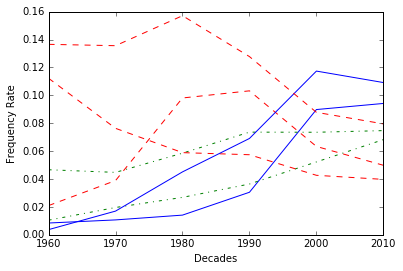

In [247]:
#plt.plot(x,y1,'r--') #0
plt.plot(x,y2,'b-') #1
plt.plot(x,y3,'g-.') #2
#plt.plot(x,y4,'b-') #3
plt.plot(x,y5,'g-.') #4
plt.plot(x,y6,'r--') #5
plt.plot(x,y7,'r--') #6
plt.plot(x,y8,'b-') #7
plt.plot(x,y9,'r--') #8
#plt.plot(x,y10,) #9
plt.xlabel('Decades')
plt.ylabel('Frequency Rate')
#plt.legend(['y1','y2','y3','y4','y5','yz2','yz4','yz6','yz8','yz9'],loc='best')

# k=11

In [278]:
x=[1960,1970,1980,1990,2000,2010]#,7,8]
#y1=[0.18756337,0.14232343,0.14209535,0.12143032,0.08494820,0.07714576]
y2=[0.05542413,0.05630671,0.05794179,0.08065028,0.11256888,0.12075409]
y3=[0.00371747,0.01698986,0.04510121,0.06906197,0.11735949,0.10914175]
#y4=[0.30686043,0.24702010,0.16997851,0.12668119,0.11246749,0.11345534]
y5=[0.03041568,0.03469134,0.04953174,0.06283890,0.07133568,0.08041175]
y6=[0.00135181,0.00453656,0.01337118,0.02266193,0.06111417,0.08429962]
y7=[0.04494762,0.08121331,0.11755498,0.09607016,0.05345713,0.04247948]
#y8=[0.24771882,0.31622487,0.28177646,0.25785941,0.22058409,0.22332981]
y9=[0.01824941,0.02775307,0.04929297,0.09328356,0.12405003,0.11212693]
y10=[0.03751267,0.04305284,0.05632346,0.05223318,0.02778488,0.02230625]
y11=[0.06623859,0.02917630,0.01642215,0.01681839,0.01384064,0.01403702]

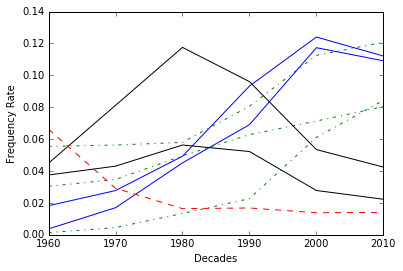

In [282]:
#plt.plot(x,y1,'r--') #0 /
plt.plot(x,y2,'g-.') #1
plt.plot(x,y3,'b-') #2
#plt.plot(x,y4,'b-') #3 /
plt.plot(x,y5,'g-.') #4
plt.plot(x,y6,'g-.') #5
plt.plot(x,y7,'k-') #6
#plt.plot(x,y8,'b-') #7 /
plt.plot(x,y9,'b-') #8
plt.plot(x,y10,'k-') #9
plt.plot(x,y11,'r--') #10
plt.xlabel('Decades')
plt.ylabel('Frequency Rate')
#plt.legend(['y1','y2','y3','y4','y5','yz2','yz4','yz6','yz8','yz9'],loc='best')

In [276]:
x=[1960,1970,1980,1990,2000,2010]
y1=[0.128191958,0.144591711,0.132249355,0.143947984,0.164880018,0.172559479]
y2=[0.096485298,0.105274861,0.119408775,0.132359674,0.169670628,0.160947139]
y3=[0.113183508,0.122976341,0.123839305,0.126136604,0.123646818,0.132217139]
y4=[0.079119638,0.092821561,0.087678745,0.085959634,0.113425308,0.136105009]
y5=[0.137715448,0.169498311,0.191862545,0.159367864,0.105768268,0.094284869]
y6=[0.111017238,0.116038071,0.123600535,0.156581264,0.176361168,0.163932319]
y7=[0.115280498,0.131337841,0.130631025,0.115530884,0.080096018,0.074111639]
y8=[0.189006418,0.117461301,0.090729715,0.080116094,0.066151778,0.065842409]

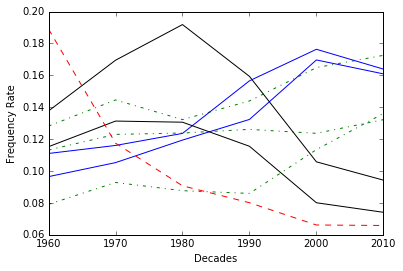

In [277]:
plt.plot(x,y1,'g-.') 
plt.plot(x,y2,'b-') 
plt.plot(x,y3,'g-.') 
plt.plot(x,y4,'g-.') 
plt.plot(x,y5,'k-') 
plt.plot(x,y6,'b-') 
plt.plot(x,y7,'k-') 
plt.plot(x,y8,'r--') 
plt.xlabel('Decades')
plt.ylabel('Frequency Rate')
#plt.legend(['y1','y2','y3','y4','y5','yz2','yz4','yz6','yz8','yz9'],loc='best')